## Context:
Tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base. A viable business model will help them understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. The company is offering 5 packages - Basic, Standard, Deluxe, Super Deluxe, King. Based on the data of last year, it was observed that 18% of the customers purchased the packages. From previous experience marketing cost was quite high because customers were contacted at random without looking at the data.
Problem Statement:
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
Company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient this time. As a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective:
•	To predict which customer is more likely to purchase the newly introduced travel package.

## Data Description:
Customer details:
1.	CustomerID: Unique customer ID
2.	ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3.	Age: Age of customer
4.	TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5.	CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6.	Occupation: Occupation of customer
7.	Gender: Gender of customer
8.	NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9.	PreferredPropertyStar: Preferred hotel property rating by customer
10.	MaritalStatus: Marital status of customer
11.	NumberOfTrips: Average number of trips in a year by customer
12.	Passport: The customer has a passport or not (0: No, 1: Yes)
13.	OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14.	NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15.	Designation: Designation of the customer in the current organization
16.	MonthlyIncome: Gross monthly income of the customer
Customer interaction data: 
1.	PitchSatisfactionScore: Sales pitch satisfaction score
2.	ProductPitched: Product pitched by the salesperson
3.	NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4.	DurationOfPitch: Duration of the pitch by a salesperson to the customer


## Key Questions:

1. What are the key factors influencing the customers to take the travel package?
2. To what extent do each of the variables impact the decision to take the product?
3. What is the correlation between these attributes if any?
2. Is there a good predictive model for predicting customers who are likely to get the travel package?  What does the performance assessment look like for such a model?

## Overview of the dataset 

## Import Libraries

In [176]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


In [2]:
tourismdataDF = pd.read_csv("D:\\course\\TOURISM.CSV")
print(f'There are {tourismdataDF.shape[0]} rows and {tourismdataDF.shape[1]} columns.')  # f-string


np.random.seed(2) # setting the random seed via np.random.seed to get the same random result
tourismdataDF.sample(n=10) # 10 random rows

There are 4888 rows and 20 columns.


CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
2055      202055          1  23.0     Self Enquiry         1             12.0   
3626      203626          0  37.0  Company Invited         1              7.0   
4812      204812          0  44.0     Self Enquiry         1             10.0   
3047      203047          0  46.0     Self Enquiry         1              9.0   
121       200121          0  33.0  Company Invited         3             28.0   
278       200278          0  26.0  Company Invited         1              6.0   
3507      203507          0  30.0     Self Enquiry         3             26.0   
3536      203536          0  46.0     Self Enquiry         1             35.0   
1623      201623          0  45.0     Self Enquiry         1             15.0   
1740      201740          0  55.0     Self Enquiry         1              6.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
2055        Salaried    Male                       3                1.0   
3626  Small Business  Female                       3                5.0   
4812        Salaried    Male                       4                6.0   
3047        Salaried  Female                       4                5.0   
121   Small Business    Male                       3                3.0   
278         Salaried  Female                       2                3.0   
3507        Salaried    Male                       4                5.0   
3536  Large Business    Male                       4                4.0   
1623        Salaried    Male                       2                3.0   
1740  Small Business    Male                       2                3.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
2055          Basic                    5.0       Married            2.0   
3626         Deluxe                    3.0       Married            2.0   
4812           King                    NaN       Married            5.0   
3047          Basic                    3.0        Single            3.0   
121          Deluxe                    4.0      Divorced            1.0   
278          Deluxe                    4.0       Married            2.0   
3507         Deluxe                    3.0       Married            3.0   
3536          Basic                    3.0       Married            6.0   
1623         Deluxe                    4.0       Married            1.0   
1740           King                    5.0        Single            1.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
2055         1                       3       0                       0.0   
3626         0                       5       1                       2.0   
4812         0                       5       1                       1.0   
3047         0                       3       1                       2.0   
121          0                       2       0                       1.0   
278          0                       5       0                       1.0   
3507         0                       4       1                       1.0   
3536         0                       3       1                       3.0   
1623         0                       4       1                       0.0   
1740         1                       1       1                       1.0   

     Designation  MonthlyIncome  
2055   Executive        16601.0  
3626     Manager        23052.0  
4812          VP        38418.0  
3047   Executive        20952.0  
121      Manager        21146.0  
278      Manager        21397.0  
3507     Manager        27298.0  
3536   Executive        20810.0  
1623     Manager        17348.0  
1740          VP        34045.0

In [3]:
tourismdataDF.shape

(4888, 20)

* The data contains 4888 rows and 20 columns

In [4]:
tourismdataDF['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

* The ratio of customers taking the travel product previously is 23:77

**Check for duplicate values in the data.**

In [5]:
tourismdataDF.duplicated().sum()

0

* There are no duplicate values in the dataset

**Summary of the dataset**

In [6]:
tourismdataDF.describe(include="all").T

count unique           top  freq      mean       std  \
CustomerID                4888    NaN           NaN   NaN    202444   1411.19   
ProdTaken                 4888    NaN           NaN   NaN  0.188216  0.390925   
Age                       4662    NaN           NaN   NaN   37.6223   9.31639   
TypeofContact             4863      2  Self Enquiry  3444       NaN       NaN   
CityTier                  4888    NaN           NaN   NaN   1.65426  0.916583   
DurationOfPitch           4637    NaN           NaN   NaN   15.4908   8.51964   
Occupation                4888      4      Salaried  2368       NaN       NaN   
Gender                    4888      3          Male  2916       NaN       NaN   
NumberOfPersonVisiting    4888    NaN           NaN   NaN   2.90507  0.724891   
NumberOfFollowups         4843    NaN           NaN   NaN   3.70845   1.00251   
ProductPitched            4888      5         Basic  1842       NaN       NaN   
PreferredPropertyStar     4862    NaN           NaN   NaN   3.58104  0.798009   
MaritalStatus             4888      4       Married  2340       NaN       NaN   
NumberOfTrips             4748    NaN           NaN   NaN   3.23652   1.84902   
Passport                  4888    NaN           NaN   NaN  0.290917  0.454232   
PitchSatisfactionScore    4888    NaN           NaN   NaN   3.07815   1.36579   
OwnCar                    4888    NaN           NaN   NaN  0.620295  0.485363   
NumberOfChildrenVisiting  4822    NaN           NaN   NaN   1.18727  0.857861   
Designation               4888      5     Executive  1842       NaN       NaN   
MonthlyIncome             4655    NaN           NaN   NaN   23619.9    5380.7   

                             min     25%     50%     75%     max  
CustomerID                200000  201222  202444  203665  204887  
ProdTaken                      0       0       0       0       1  
Age                           18      31      36      44      61  
TypeofContact                NaN     NaN     NaN     NaN     NaN  
CityTier                       1       1       1       3       3  
DurationOfPitch                5       9      13      20     127  
Occupation                   NaN     NaN     NaN     NaN     NaN  
Gender                       NaN     NaN     NaN     NaN     NaN  
NumberOfPersonVisiting         1       2       3       3       5  
NumberOfFollowups              1       3       4       4       6  
ProductPitched               NaN     NaN     NaN     NaN     NaN  
PreferredPropertyStar          3       3       3       4       5  
MaritalStatus                NaN     NaN     NaN     NaN     NaN  
NumberOfTrips                  1       2       3       4      22  
Passport                       0       0       0       1       1  
PitchSatisfactionScore         1       2       3       4       5  
OwnCar                         0       0       1       1       1  
NumberOfChildrenVisiting       0       1       1       2       3  
Designation                  NaN     NaN     NaN     NaN     NaN  
MonthlyIncome               1000   20346   22347   25571   98678

* Basic is the top product pitched
* There are more males in the customer base than females
* Age has a big range from 18-61. Median is 36.
* More married folks in the customer base
* Executive class of customers are more than any other class
* Monthly income has huge range. Also 75 percentile of the people have till 25557. The top figure is 98678 indicating some outliers in this category.

In [7]:
tourismdataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- We can see that there are total 20 columns and 4888  number of rows in the dataset.
- All columns' data type is either integer or float. There are some object type columns as well.
- There are null values in some columns as can be seen from above. 

In [8]:
tourismdataDF.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
ProductPitched                0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
PitchSatisfactionScore        0
CityTier                      0
OwnCar                        0
ProdTaken                     0
CustomerID                    0
dtype: int64

* There are missing values mainly in Duration of Pitch, monthly income, Age, number of trips, number of children visiting , number of followups, Prefered Property star, Type of contact

**Number of unique values in each column**

In [9]:
tourismdataDF.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- We can drop 'CustomerID ' column as it is an ID variable and will not add value to the model.

In [10]:
#Dropping two columns from the dataframe
tourismdataDF.drop(columns=['CustomerID'], inplace=True)

* Converting the columns with an 'object' datatype into categorical variables

In [11]:
for feature in tourismdataDF.columns: # Loop through all columns in the dataframe
    if tourismdataDF[feature].dtype == 'object': # Only apply for columns with categorical strings
        tourismdataDF[feature] = pd.Categorical(tourismdataDF[feature])# Replace strings with an integer
tourismdataDF.head(10)

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0          1  41.0     Self Enquiry         3              6.0   
1          0  49.0  Company Invited         1             14.0   
2          1  37.0     Self Enquiry         1              8.0   
3          0  33.0  Company Invited         1              9.0   
4          0   NaN     Self Enquiry         1              8.0   
5          0  32.0  Company Invited         1              8.0   
6          0  59.0     Self Enquiry         1              9.0   
7          0  30.0     Self Enquiry         1             30.0   
8          0  38.0  Company Invited         1             29.0   
9          0  36.0     Self Enquiry         1             33.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   
5        Salaried    Male                       3                3.0   
6  Small Business  Female                       2                2.0   
7        Salaried    Male                       3                3.0   
8        Salaried    Male                       2                4.0   
9  Small Business    Male                       3                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   
5          Basic                    3.0        Single            1.0   
6          Basic                    5.0      Divorced            5.0   
7          Basic                    3.0       Married            2.0   
8       Standard                    3.0     Unmarried            1.0   
9         Deluxe                    3.0      Divorced            7.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   
5         0                       5       1                       1.0   
6         1                       2       1                       1.0   
7         0                       2       0                       1.0   
8         0                       3       0                       0.0   
9         0                       3       1                       0.0   

      Designation  MonthlyIncome  
0         Manager        20993.0  
1         Manager        20130.0  
2       Executive        17090.0  
3       Executive        17909.0  
4       Executive        18468.0  
5       Executive        18068.0  
6       Executive        17670.0  
7       Executive        17693.0  
8  Senior Manager        24526.0  
9         Manager        20237.0

In [12]:
print(tourismdataDF.ProdTaken.value_counts())
print(tourismdataDF.TypeofContact.value_counts())
print(tourismdataDF.CityTier.value_counts())
print(tourismdataDF.DurationOfPitch.value_counts())
print(tourismdataDF.Occupation.value_counts())
print(tourismdataDF.Gender.value_counts())
print(tourismdataDF.NumberOfPersonVisiting.value_counts())
print(tourismdataDF.NumberOfFollowups.value_counts())
print(tourismdataDF.ProductPitched.value_counts())
print(tourismdataDF.PreferredPropertyStar.value_counts())
print(tourismdataDF.MaritalStatus.value_counts())
print(tourismdataDF.NumberOfTrips.value_counts())
print(tourismdataDF.Passport.value_counts())
print(tourismdataDF.PitchSatisfactionScore.value_counts())
print(tourismdataDF.OwnCar.value_counts())
print(tourismdataDF.NumberOfChildrenVisiting.value_counts())
print(tourismdataDF.Designation.value_counts())

0    3968
1     920
Name: ProdTaken, dtype: int64
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
32.0      74
29.0      74
21.0      73
25.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      61
33.0      57
19.0      57
34.0      50
36.0      44
5.0        6
126.0      1
127.0      1
Name: DurationOfPitch, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
4.0    2068
3.0    1466
5.0     768
2.0 

* There is an additional category in gender because of type "Fe male". Including them under female.

In [13]:
tourismdataDF['Gender'] = tourismdataDF['Gender'].replace(['Fe Male'],'Female')

In [14]:
print(tourismdataDF.Gender.value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64


## Univariate Analysis

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

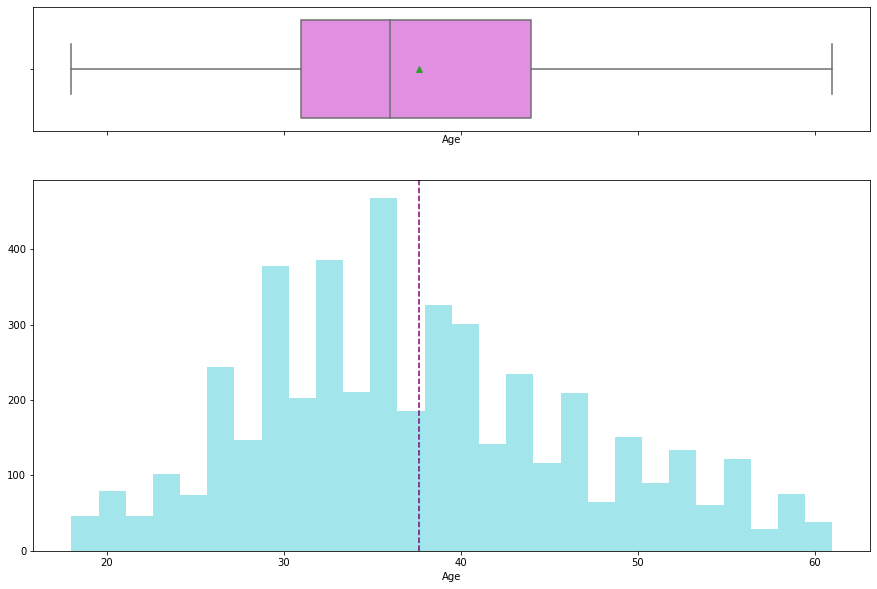

In [16]:
histogram_boxplot(tourismdataDF.Age)

- Age has an approx symmetric distribution with mean around 38
- As evident from the boxplot, there are no outliers in the distribution for this variable

### Observations on DurationOfPitch

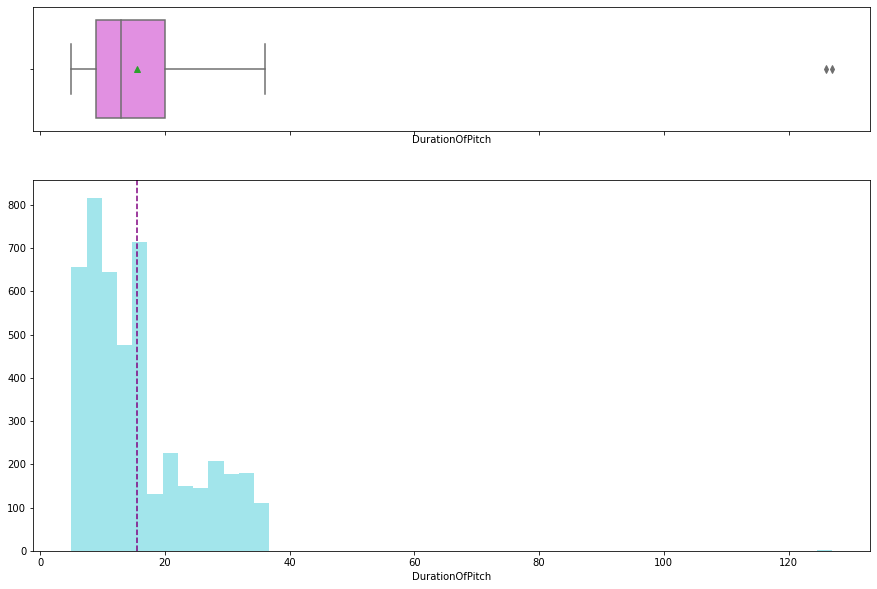

In [17]:
histogram_boxplot(tourismdataDF.DurationOfPitch)

- Duration of Pitch is right skewed.
- As evident from the boxplot, there are a few outliers in this variable

### Observations on NumberOfPersonVisiting

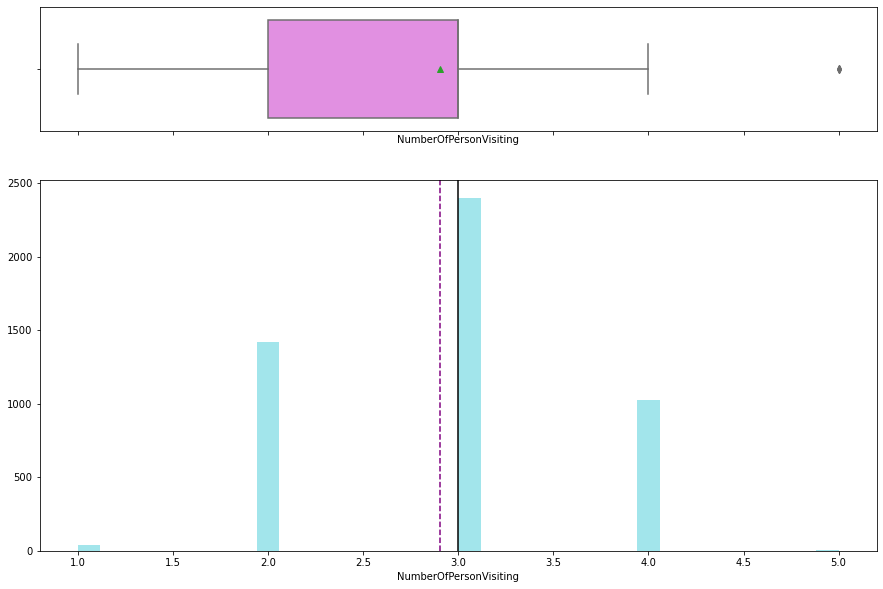

In [18]:
histogram_boxplot(tourismdataDF.NumberOfPersonVisiting)

- Number of Persons visiting has an approx symmetric distribution with mean median close aroung 3


### Observations on NumberOfFollowups

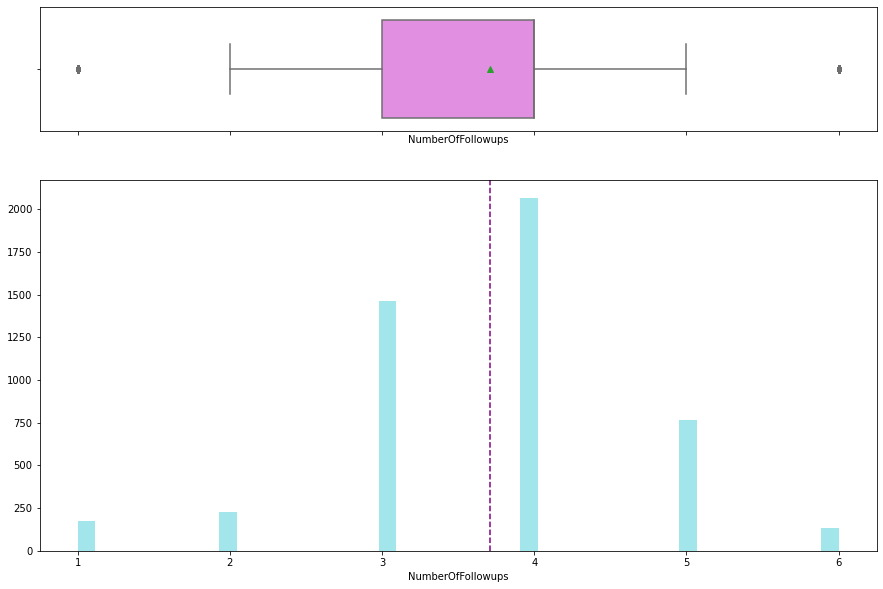

In [19]:
histogram_boxplot(tourismdataDF.NumberOfFollowups)

- Duration of Pitch is right skewed.
- As evident from the boxplot, there are a few outliers in this variable

### Observations on NumberOfTrips	

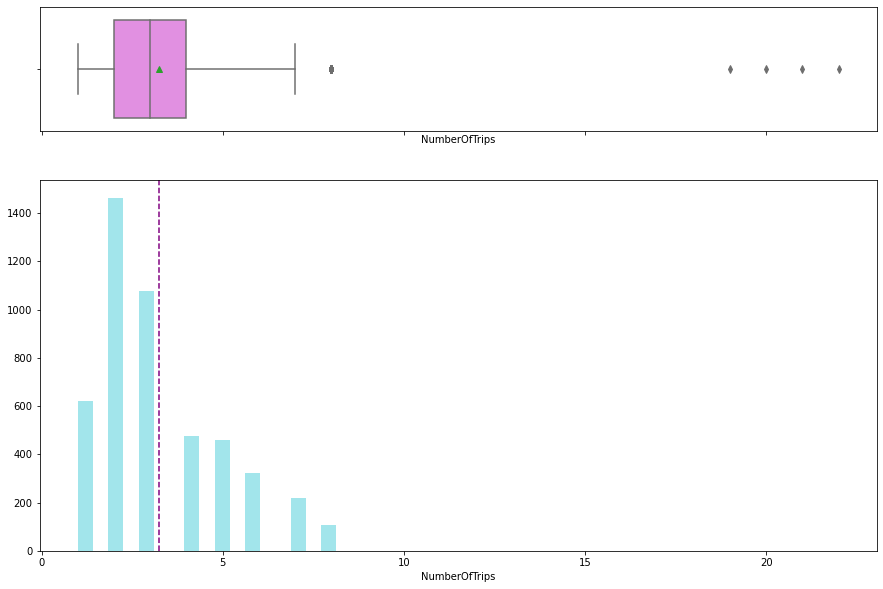

In [20]:
histogram_boxplot(tourismdataDF.NumberOfTrips)

- Number of trips is right skewed.
- As evident from the boxplot, there are a outliers in this variable.

### Observations on NumberOfChildrenVisiting	

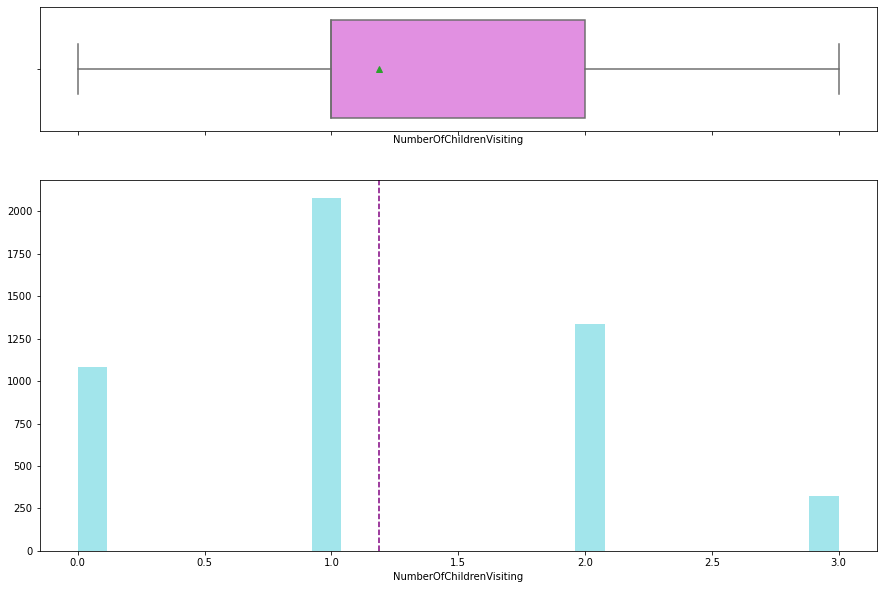

In [21]:
histogram_boxplot(tourismdataDF.NumberOfChildrenVisiting)

- Number of trips has approximately symmetric distribution
- As evident from the boxplot, not outliers in this variable

### Observations on MonthlyIncome	

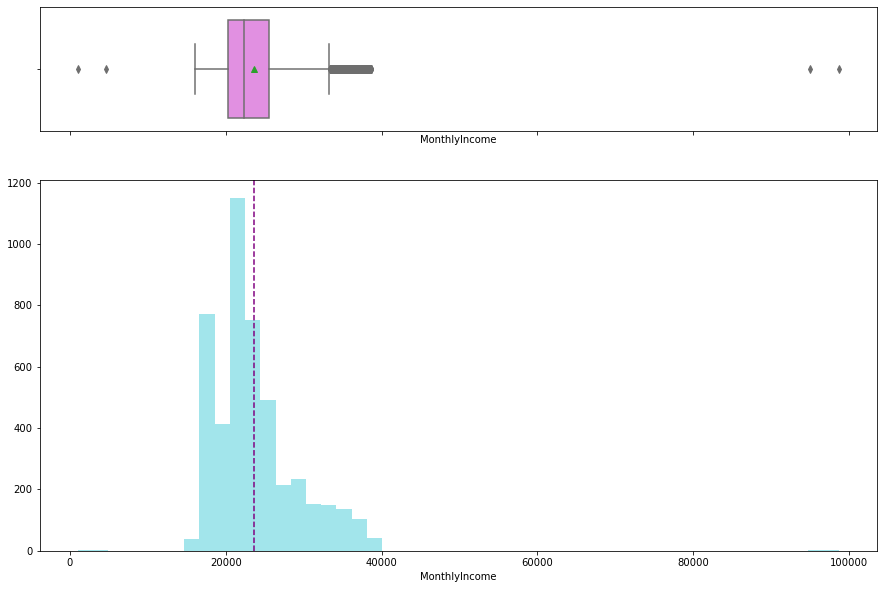

In [22]:
histogram_boxplot(tourismdataDF.MonthlyIncome)

- Monthly income is a bit right skewed. 
- As evident from the boxplot, there are outliers in this variable on either side.

In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(tourismdataDF[z]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(tourismdataDF[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on ProdTaken

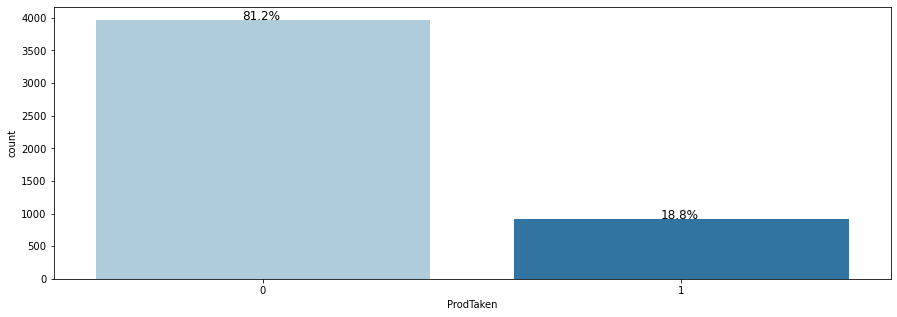

In [24]:
perc_on_bar('ProdTaken')

* Only 19% of the customers have taken the product

### Observations on TypeofContact

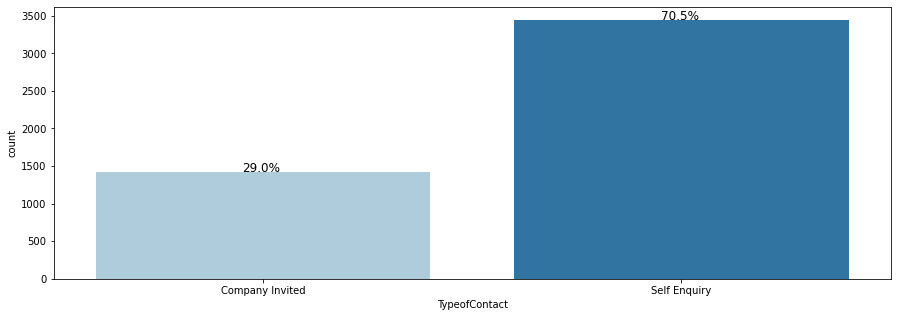

In [25]:
perc_on_bar('TypeofContact')

* For 70% of the customers the contact was established using Self Inquiry

### Observations on CityTier

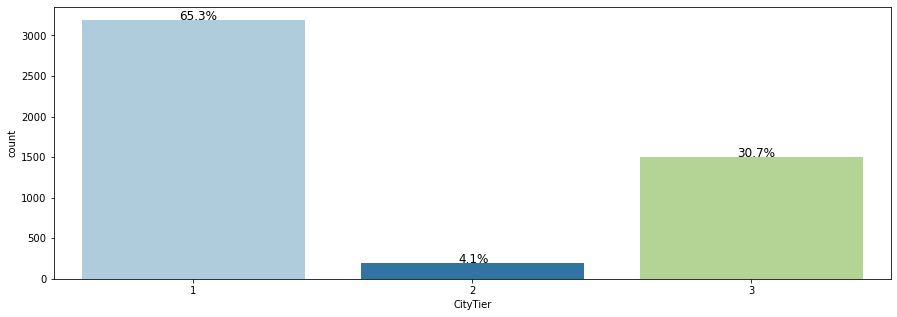

In [26]:
perc_on_bar('CityTier')

* 65% of the customers come from tier1 city

### Observations on Occupation

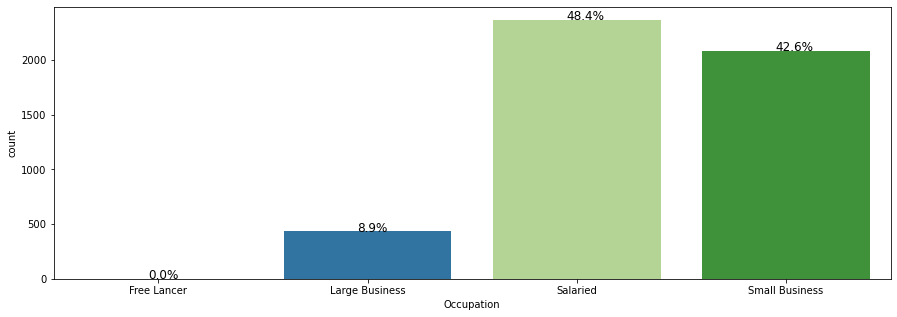

In [27]:
perc_on_bar('Occupation')

* Mostly there are small business and salaried customers.

### Observations on Gender

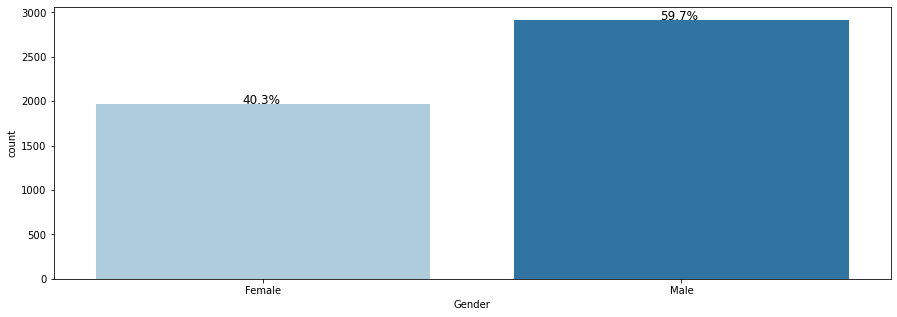

In [28]:
perc_on_bar('Gender')

* 60% of customers are males.

### Observations on ProductPitched

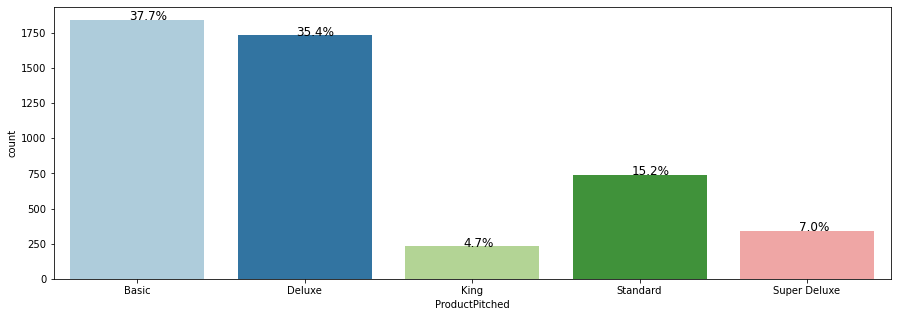

In [29]:
perc_on_bar('ProductPitched')

* Basic and Deluxe products were pitched much more than the rest

### Observations on PreferredPropertyStar

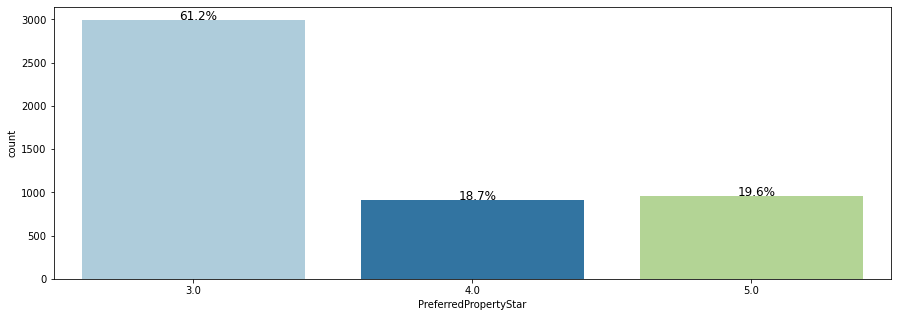

In [30]:
perc_on_bar('PreferredPropertyStar')

* Prefered Hotel rating is 3 star

### Observations on MaritalStatus	

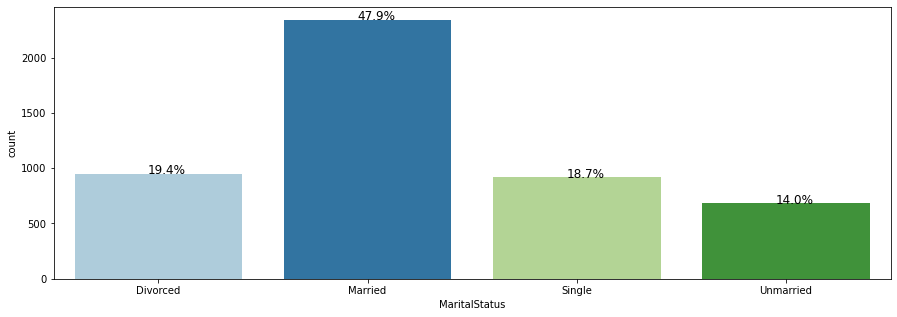

In [31]:
perc_on_bar('MaritalStatus')

* Majority of customers are married.

### Observations on Passport	

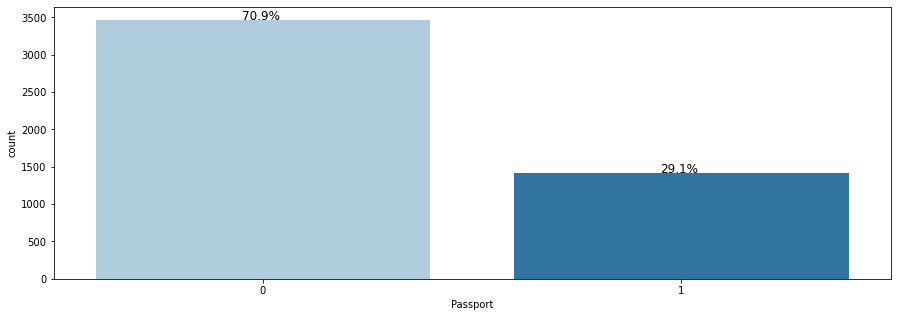

In [32]:
perc_on_bar('Passport')

* Majority of customers do not have a passport so don't travel internationally

### Observations on OwnCar	

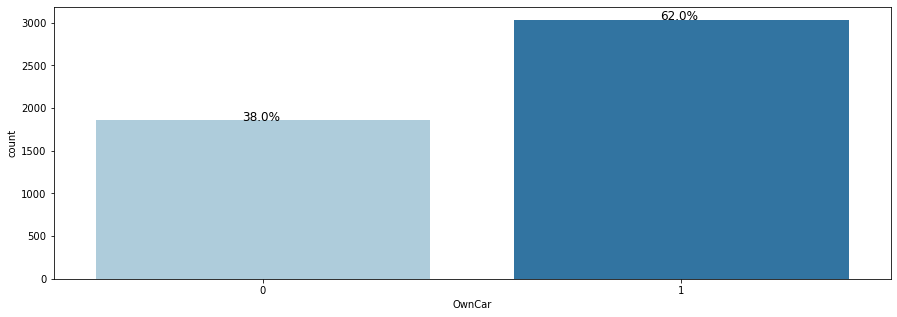

In [33]:
perc_on_bar('OwnCar')

* Majoirty of customers have a car

### Observations on Designation	

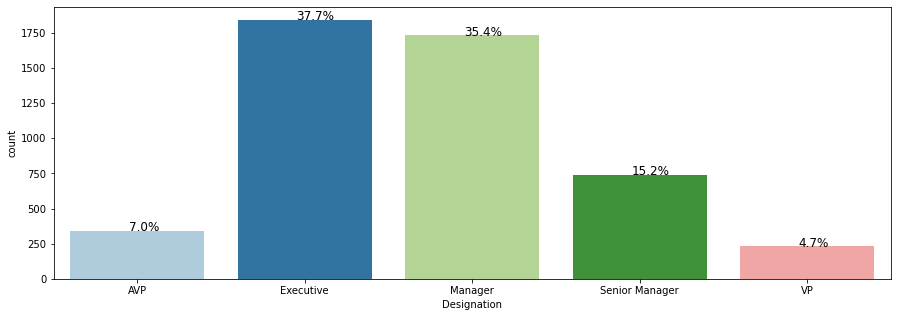

In [34]:
perc_on_bar('Designation')

* Majority of customers have a executive or manager designation

## Bivariate analysis

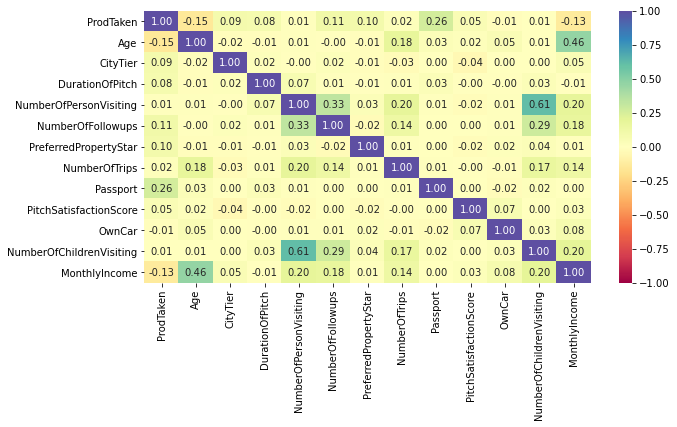

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(tourismdataDF.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

- We can see that highest correlation exists with passport and product taken than any other variable with product taken
- There is a negative correlation between age and product taken. Older the customer less chance of taking the package.
- Age is positively correlated with Monthly income
- Expectedly there is a positive correlation between the number of persons visiting and number of children visiting.
- There is a slight correlation between monthly income and number of trips, number of persons visting and number of followups.

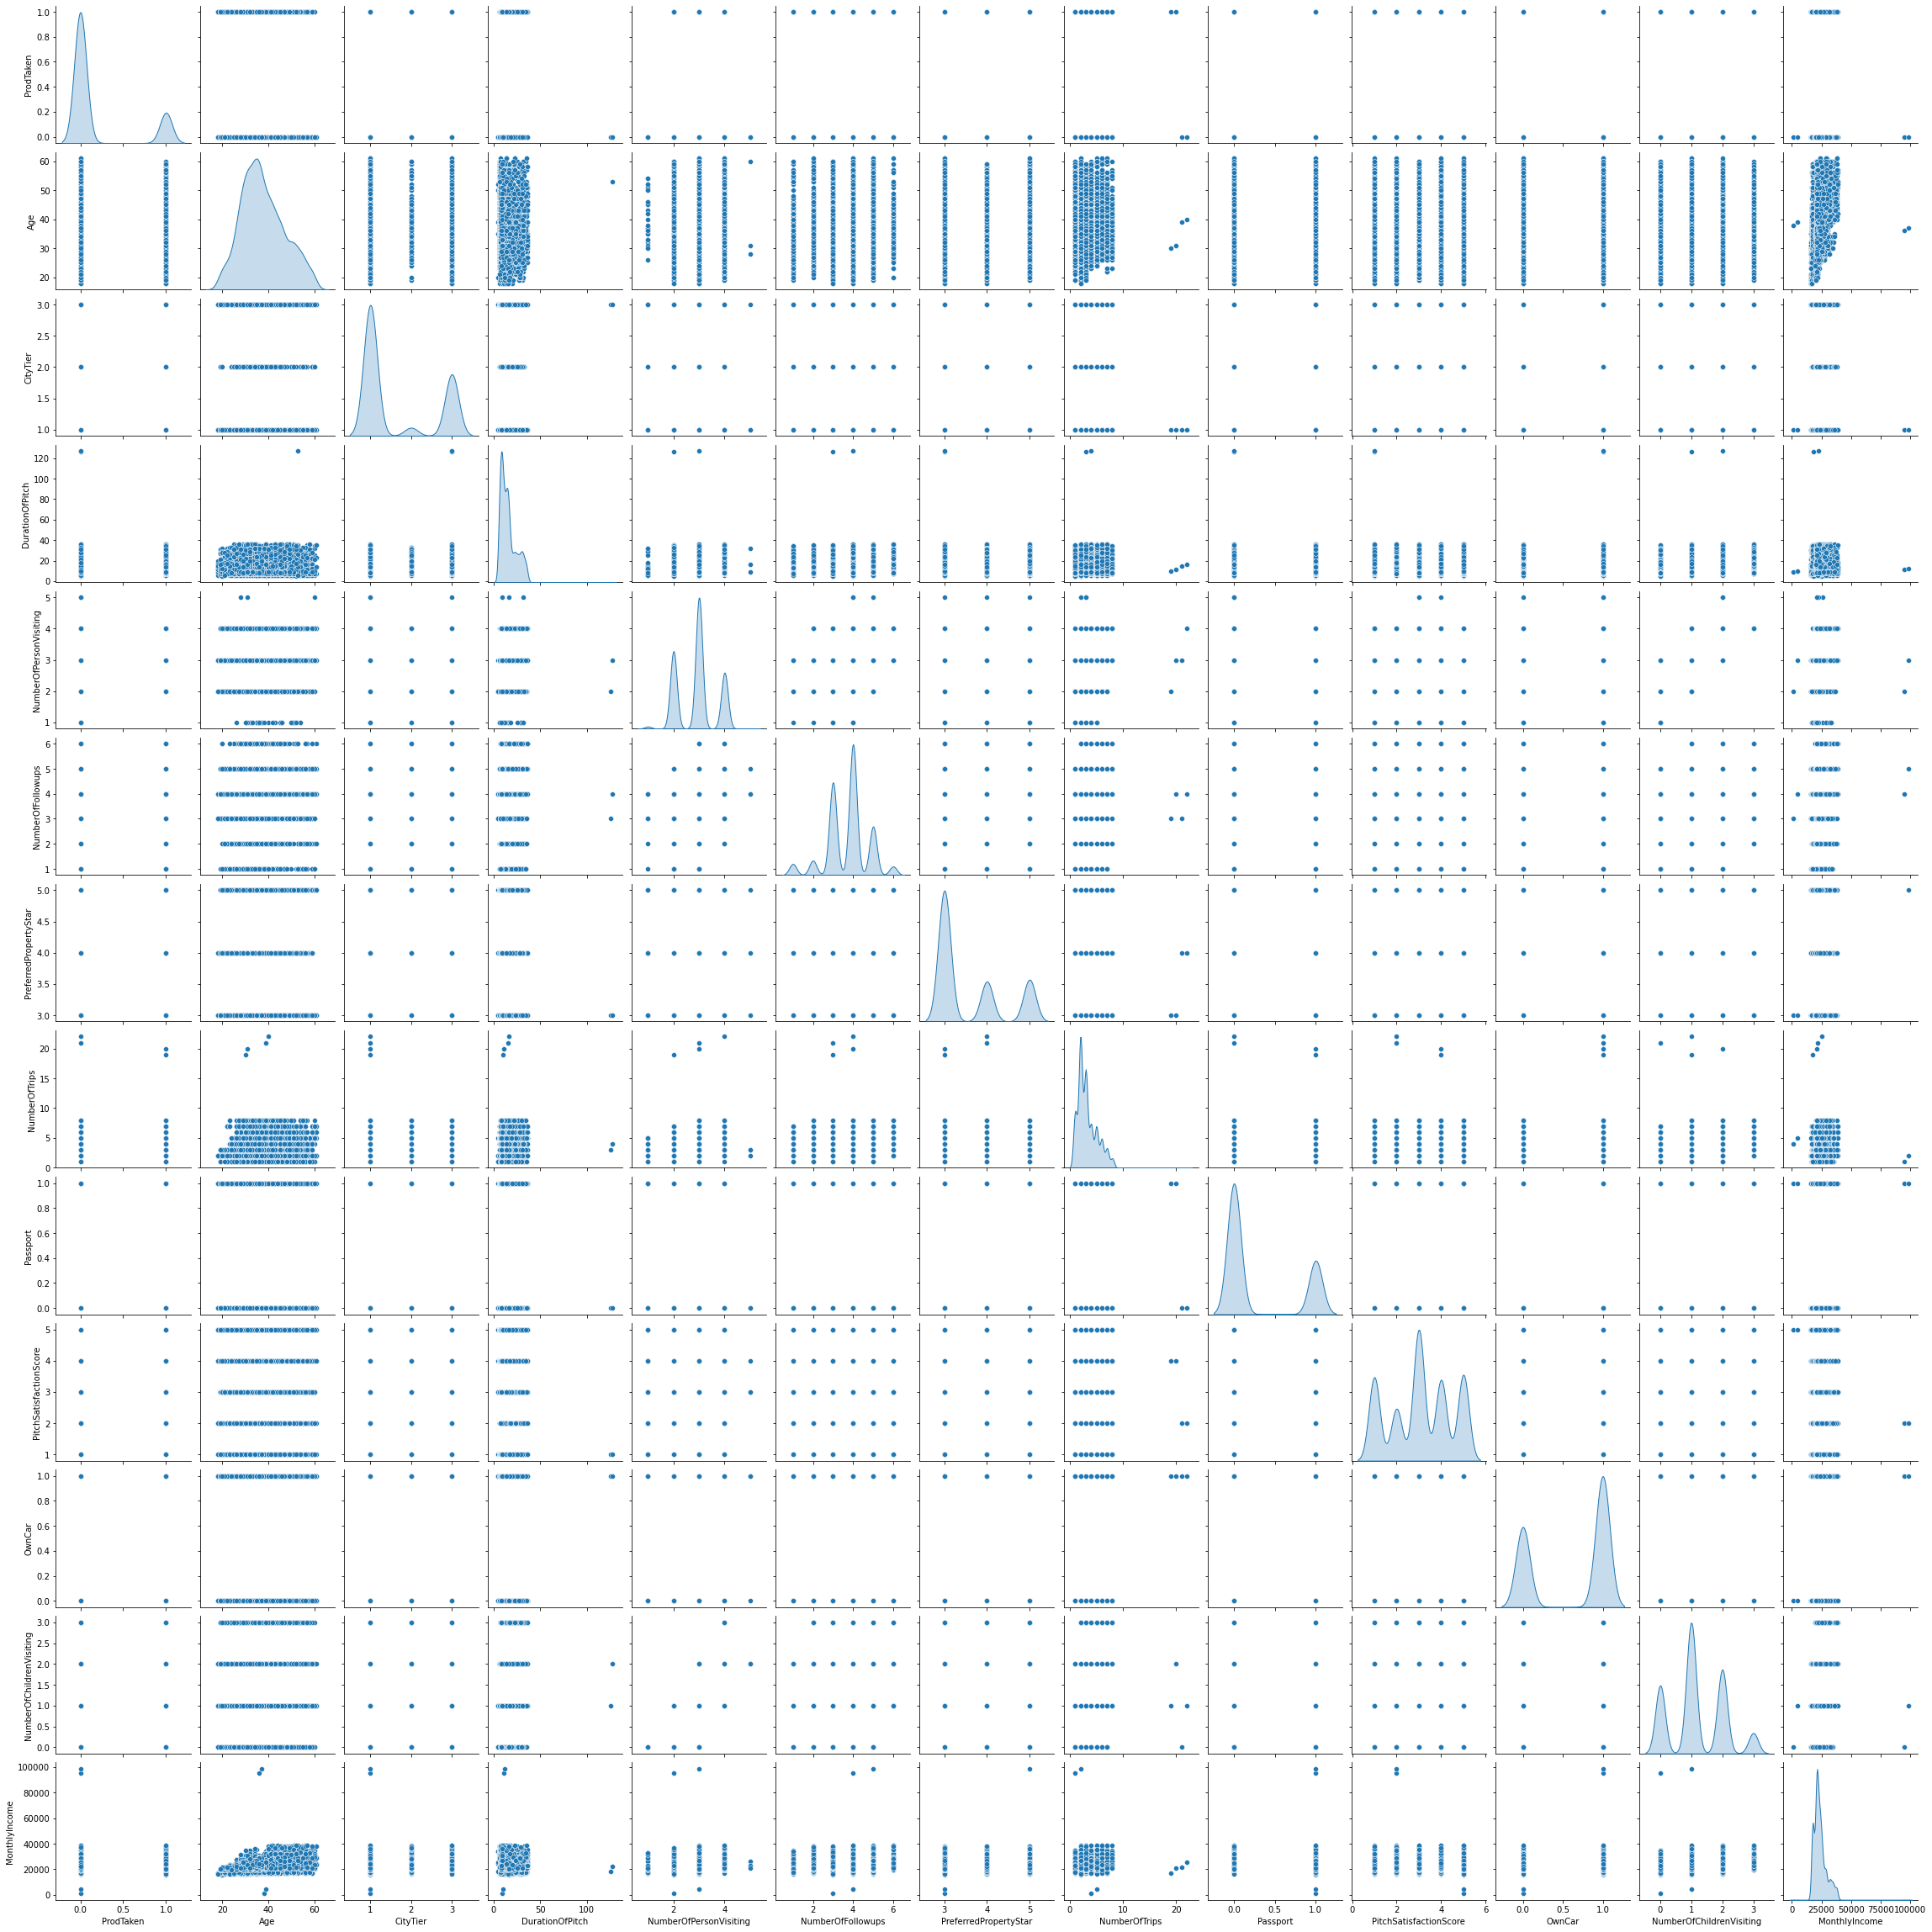

In [36]:
sns.pairplot(tourismdataDF,diag_kind='kde')

In [37]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,tourismdataDF['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,tourismdataDF['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
------------------------------------------------------------------------------------------------------------------------


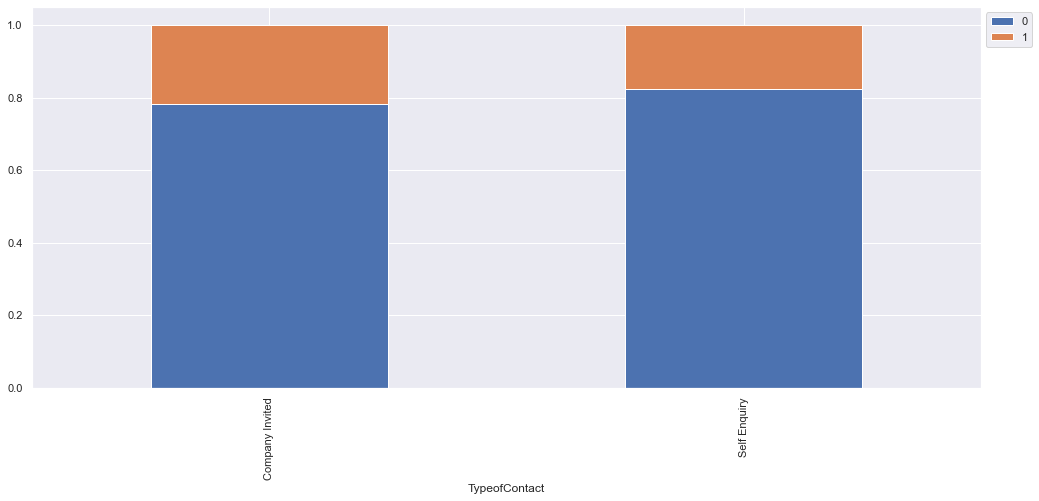

In [38]:
stacked_plot(tourismdataDF['TypeofContact'])

- Product was taken slightly more with company invited customers as compared to the Self Inquiry

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


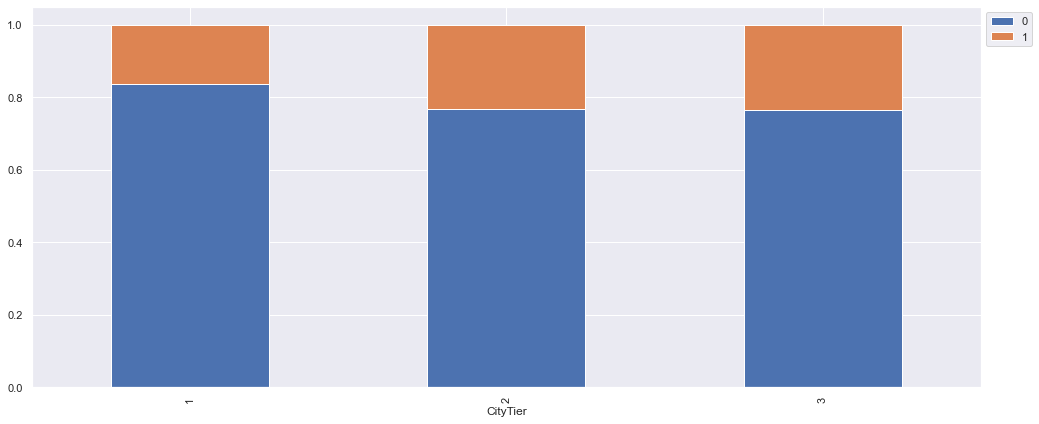

In [39]:
stacked_plot(tourismdataDF['CityTier'])

* Product was taken more in Tier 2 and 3 cities.

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


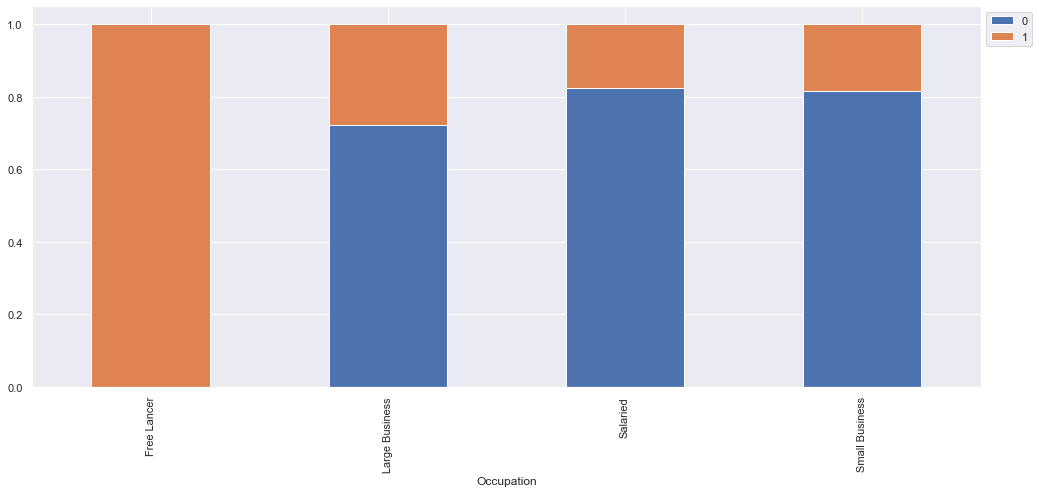

In [40]:
stacked_plot(tourismdataDF['Occupation'])

* There are only 2 free lancers and both of them took the product 
* Large business owners took the product more than salaried and small business owners

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


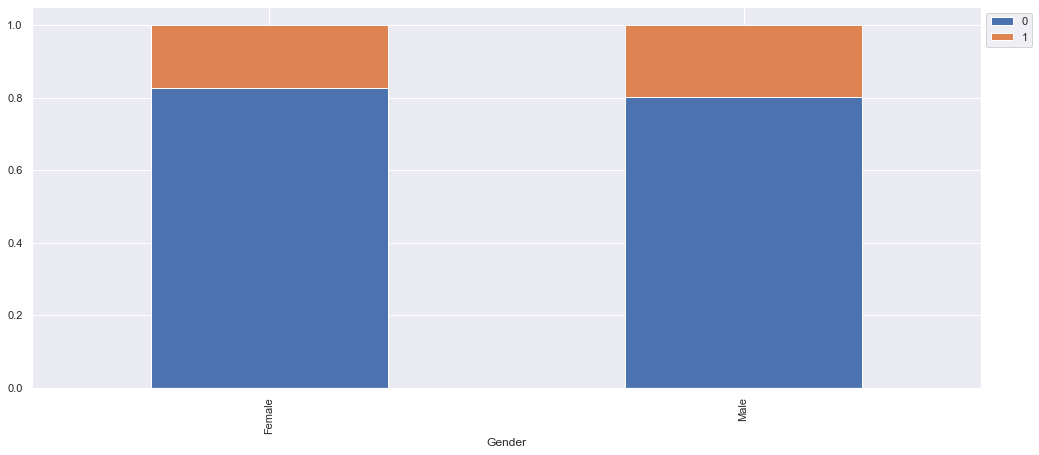

In [41]:
stacked_plot(tourismdataDF['Gender'])

* The product is taken more by the males as compared to the females

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


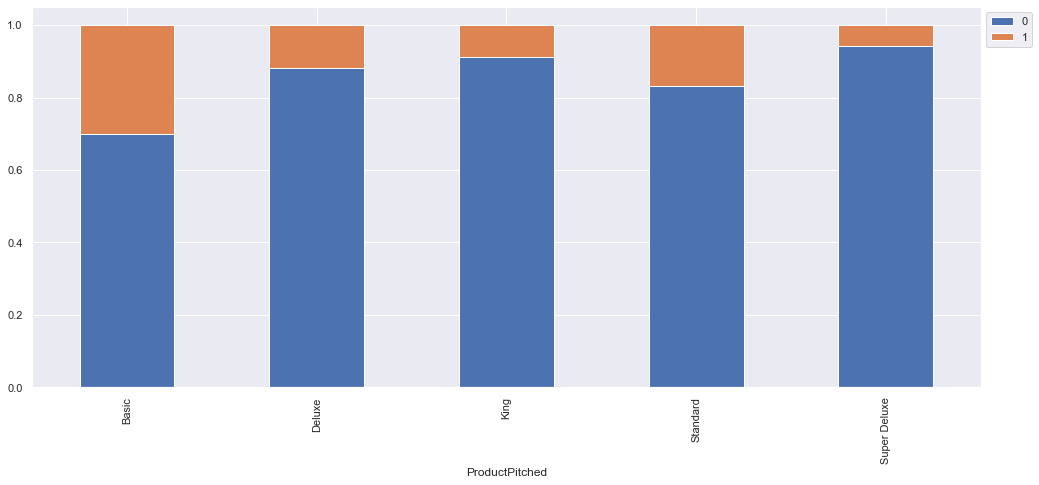

In [42]:
stacked_plot(tourismdataDF['ProductPitched'])

* Out of the products pitched Basic was the most taken followed by standard.  
* Super Deluxe was the least taken product

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
All                    3948  914  4862
------------------------------------------------------------------------------------------------------------------------


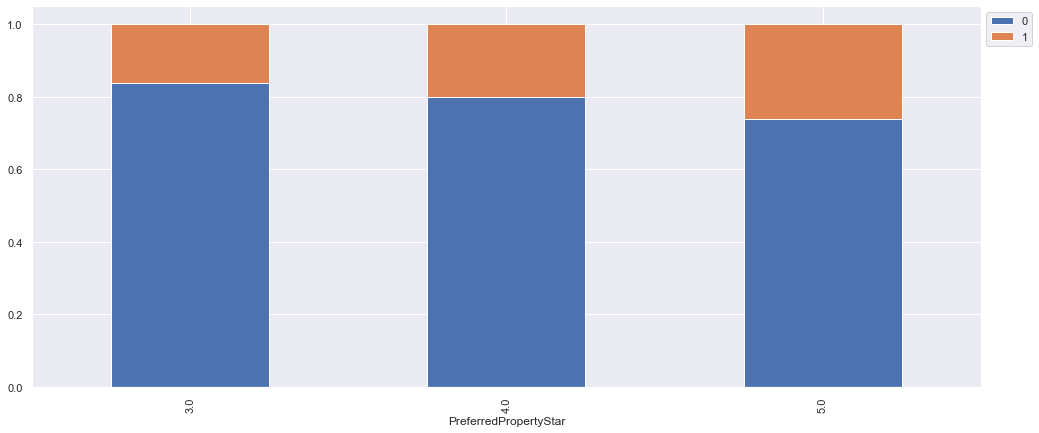

In [43]:
stacked_plot(tourismdataDF['PreferredPropertyStar'])

* Product was taken with Prefered 5 star property

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


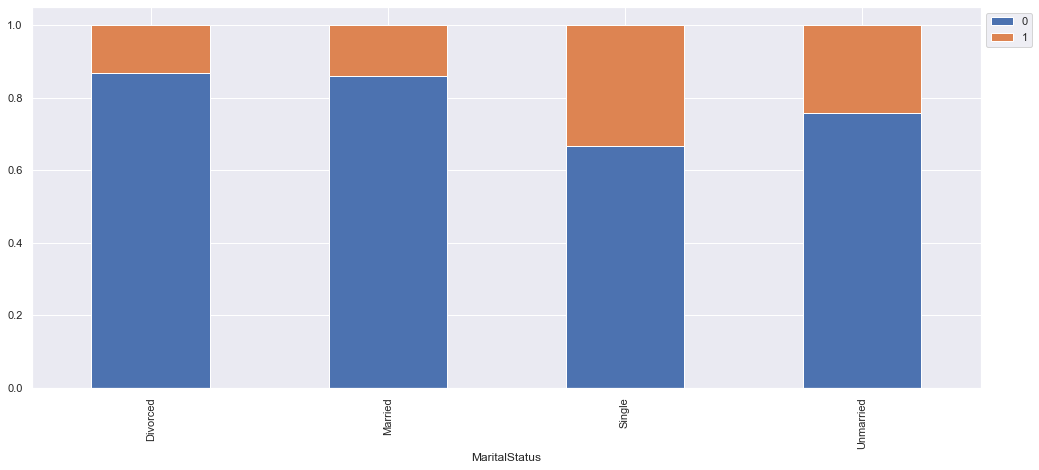

In [44]:
stacked_plot(tourismdataDF['MaritalStatus'])

* Product was taken more by Unmarried and single people as compared to divourced and married.

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


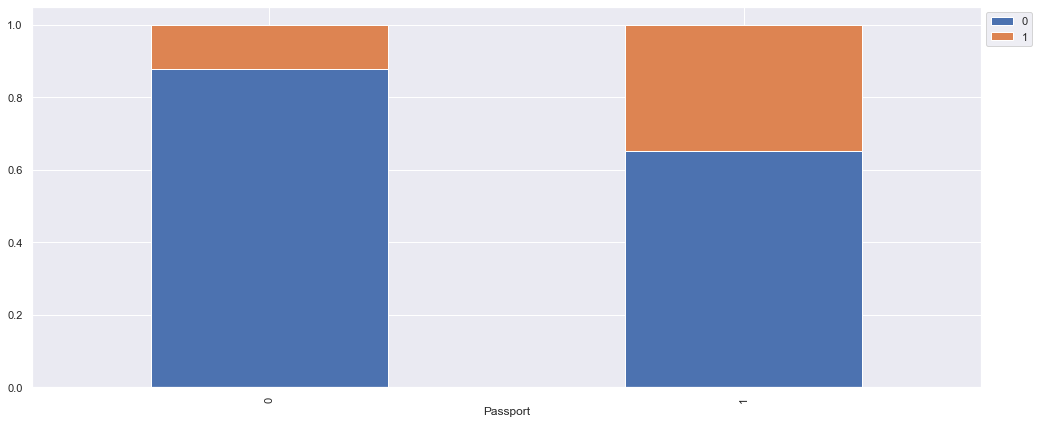

In [45]:
stacked_plot(tourismdataDF['Passport'])

* Product was taken more by people with passports

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


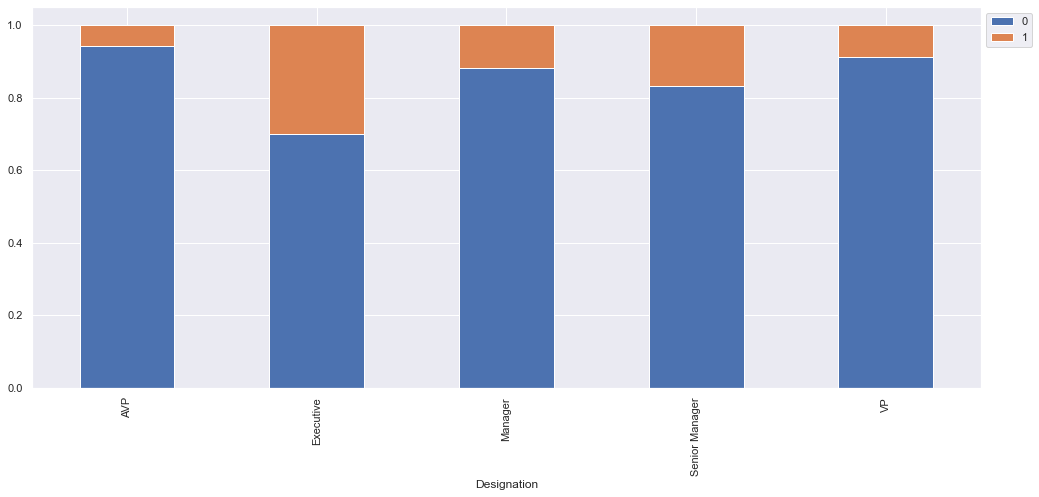

In [46]:
stacked_plot(tourismdataDF['Designation'])

* Executives took the product more as compared to anyone else.

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


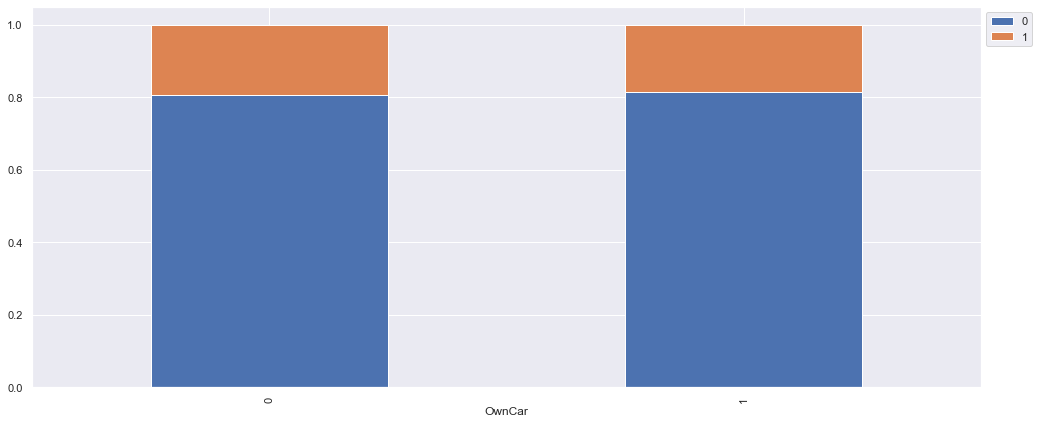

In [47]:
stacked_plot(tourismdataDF['OwnCar'])

* Product was taken alsmot equally by people with car as compared to people without car

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


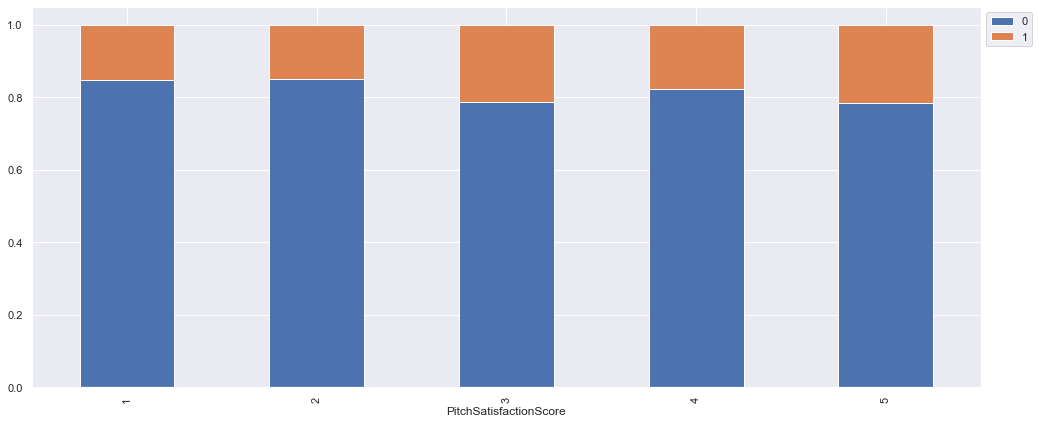

In [48]:
stacked_plot(tourismdataDF['PitchSatisfactionScore'])

* Product was taken more by people who had sales pitch satisfaction score of 3 and 5

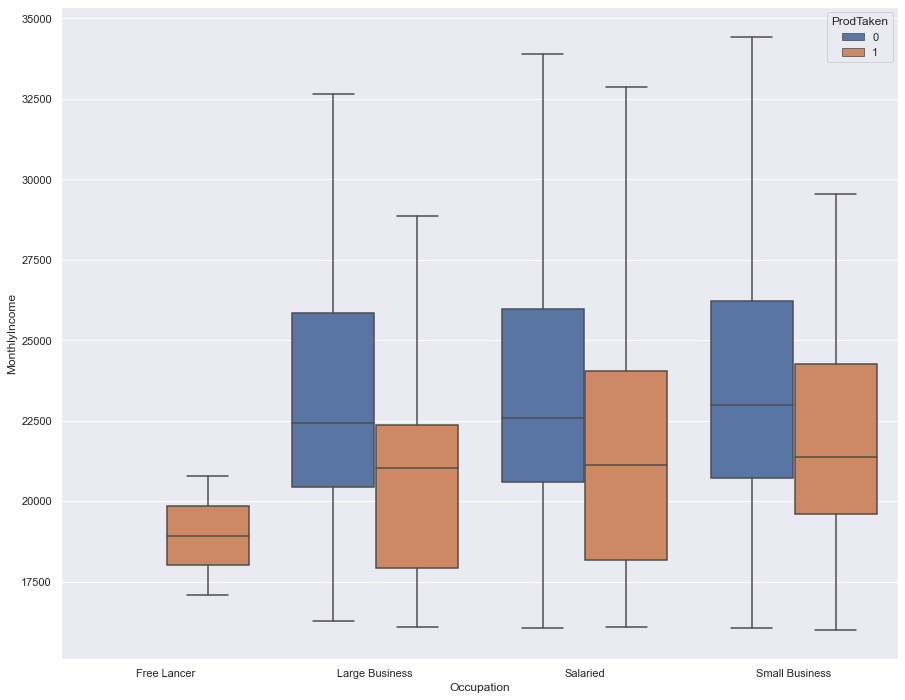

In [49]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15,12))
sns.boxplot(y="MonthlyIncome", x="Occupation", data=tourismdataDF,hue='ProdTaken',showfliers=False);

* Relatively higher income customers for small business category took the product
* Range of salaried employees taking the product was more than any other category

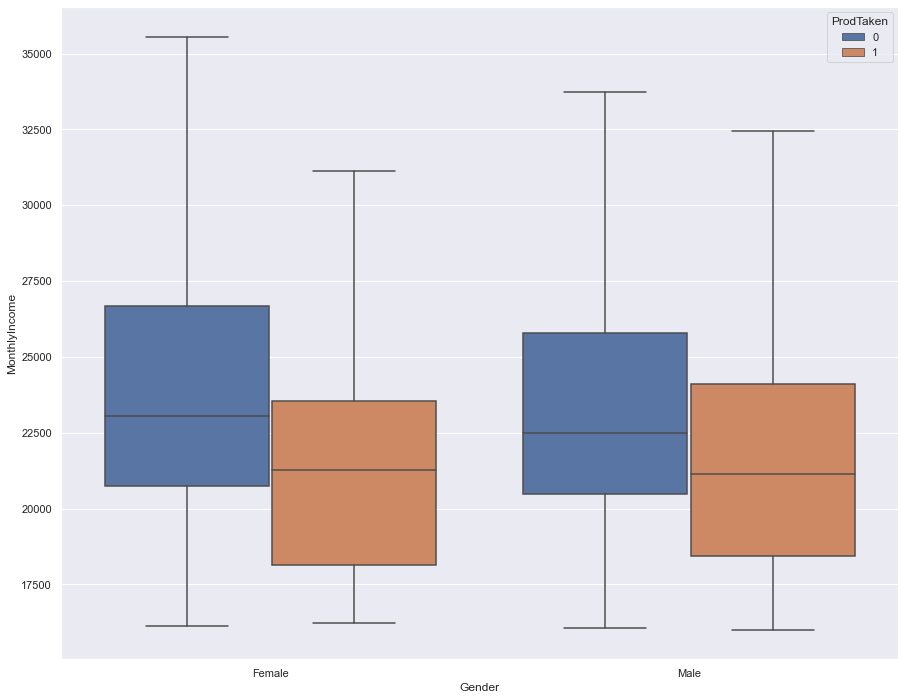

In [50]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15,12))
sns.boxplot(y="MonthlyIncome", x="Gender", data=tourismdataDF,hue='ProdTaken',showfliers=False);

* Income range for  males taking the product is  higher than females

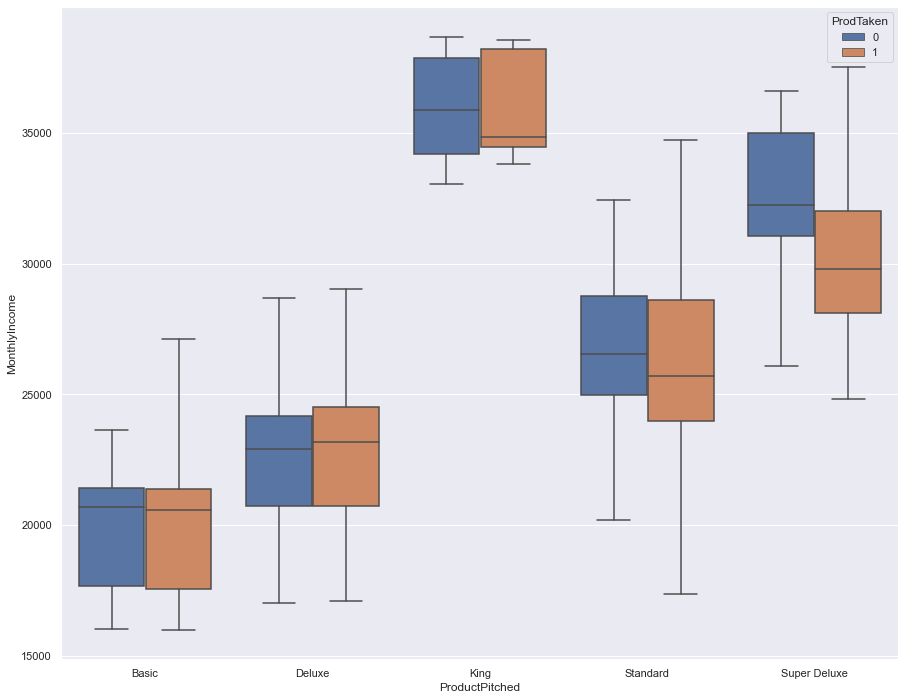

In [51]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15,12))
sns.boxplot(y="MonthlyIncome", x="ProductPitched", data=tourismdataDF,hue='ProdTaken',showfliers=False);

* King Product was taken by the highest income range people followed by super deluxe
* Basic product was taken by lowest income range customers

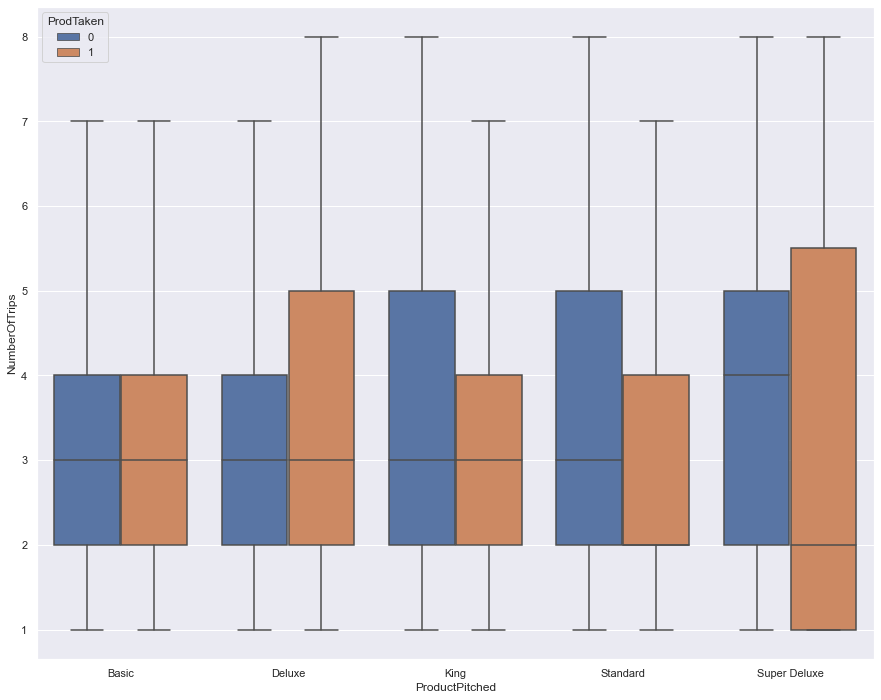

In [52]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15,12))
sns.boxplot(y="NumberOfTrips", x="ProductPitched", data=tourismdataDF,hue='ProdTaken',showfliers=False);

* Super deluxe product was taken by customers with a wide range of number of tripes per year
* Range of number fo trips is the same for Basic and King product
* More than 50% of the customers have more than 2 trips for Standard product

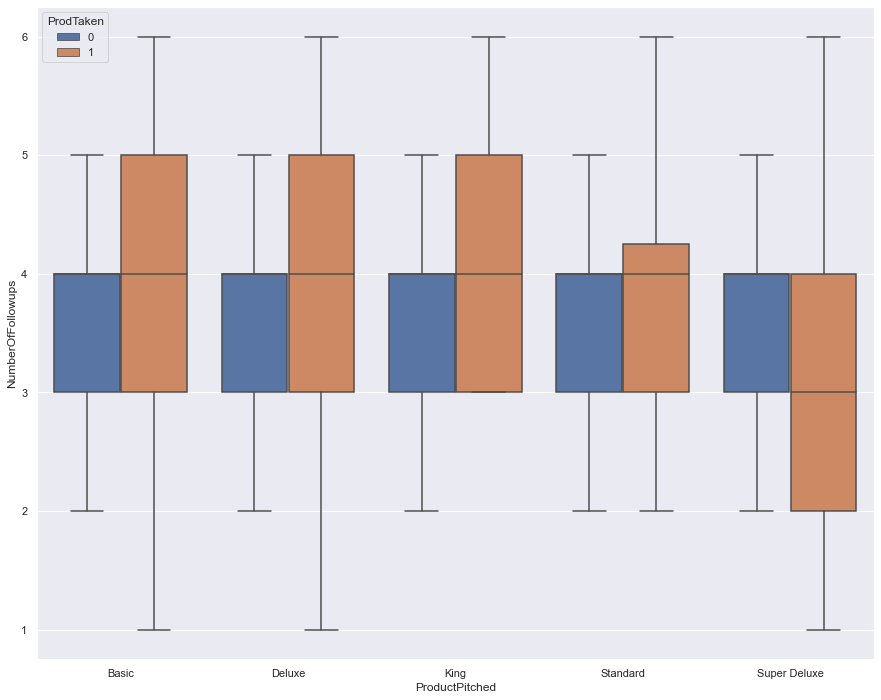

In [53]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15,12))
sns.boxplot(y="NumberOfFollowups", x="ProductPitched", data=tourismdataDF,hue='ProdTaken',showfliers=False);

* 25% of the customers required till 2 follow ups for Super Deluxe product 
* For rest fo the products 75% of the customers required atleast 3 followups

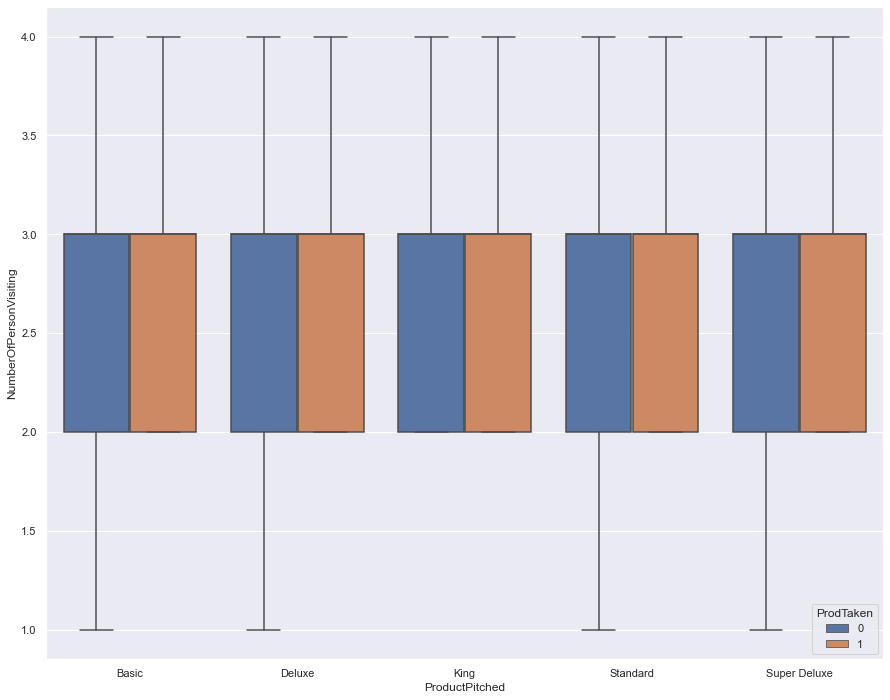

In [54]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15,12))
sns.boxplot(y="NumberOfPersonVisiting", x="ProductPitched", data=tourismdataDF,hue='ProdTaken',showfliers=False);

* 50% of the people for each product who took the product made trips with 2-3 people.

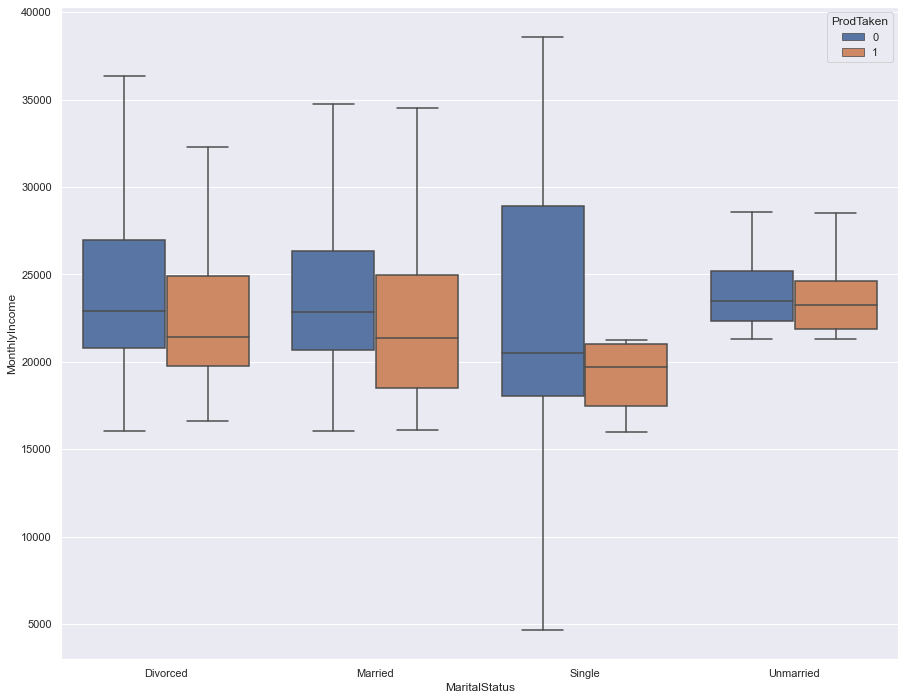

In [55]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15,12))
sns.boxplot(y="MonthlyIncome", x="MaritalStatus", data=tourismdataDF,hue='ProdTaken',showfliers=False);

* Range for divorced and married people is more than single and unmarried

## Missing Value Treatment

In [56]:
tourismdataDF.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

In [57]:
print(tourismdataDF['DurationOfPitch'].isnull().sum())
tourismdataDF['DurationOfPitch'].fillna(tourismdataDF['DurationOfPitch'].mean(), inplace=True)  # mean imputation
tourismdataDF['DurationOfPitch'].isnull().sum()

251


0

* Put in the mean for Duration of Pitch

In [58]:
tourismdataDF['TypeofContact'].mode()

0    Self Enquiry
Name: TypeofContact, dtype: category
Categories (2, object): ['Company Invited', 'Self Enquiry']

In [59]:
tourismdataDF['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [60]:
print(tourismdataDF['TypeofContact'].isnull().sum())
tourismdataDF['TypeofContact'].fillna("Self Enquiry", inplace=True)  
tourismdataDF['TypeofContact'].isnull().sum()

25


0

* Put in the mode for the type of contact

In [61]:
tourismdataDF['PreferredPropertyStar'].value_counts()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

For null values for PreferedPropertyStar putting the mode of the rest of the values

In [62]:
print(tourismdataDF['PreferredPropertyStar'].isnull().sum())
tourismdataDF['PreferredPropertyStar'].fillna(3.0, inplace=True)  
tourismdataDF['PreferredPropertyStar'].isnull().sum()

26


0

* Put in the mode for Prefered Property star

In [63]:
print(tourismdataDF['MonthlyIncome'].isnull().sum())
tourismdataDF['MonthlyIncome'].fillna(tourismdataDF['MonthlyIncome'].mean(), inplace=True)  # mean imputation
tourismdataDF['MonthlyIncome'].isnull().sum()

233


0

* Put in the mean value for monthly income

In [64]:
print(tourismdataDF.Age.value_counts())

35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64


In [65]:
print(tourismdataDF['Age'].isnull().sum())
tourismdataDF['Age'].fillna(math.floor(tourismdataDF['Age'].mean()), inplace=True)  # mean imputation
tourismdataDF['Age'].isnull().sum()

226


0

* Put in the mean for Age

In [66]:
print(tourismdataDF.NumberOfTrips.value_counts())

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64


In [67]:
print(tourismdataDF['NumberOfTrips'].isnull().sum())
tourismdataDF['NumberOfTrips'].fillna(2.0, inplace=True)  # mean imputation
tourismdataDF['NumberOfTrips'].isnull().sum()

140


0

* Put in the mode for number of trips

In [68]:
print(tourismdataDF['NumberOfFollowups'].isnull().sum())
tourismdataDF['NumberOfFollowups'].fillna(statistics.mode(tourismdataDF['NumberOfFollowups']), inplace=True)  # mean imputation
tourismdataDF['NumberOfFollowups'].isnull().sum()

45


0

* Put in the mode for number of followups

In [69]:
print(tourismdataDF['NumberOfChildrenVisiting'].isnull().sum())
tourismdataDF['NumberOfChildrenVisiting'].fillna(statistics.mode(tourismdataDF['NumberOfChildrenVisiting']), inplace=True)  # mean imputation
tourismdataDF['NumberOfChildrenVisiting'].isnull().sum()

66


0

* Put in the mode for number of children visiting

In [70]:
tourismdataDF.isnull().sum().sort_values(ascending=False)

MonthlyIncome               0
NumberOfFollowups           0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
ProductPitched              0
Designation                 0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
ProdTaken                   0
dtype: int64

In [71]:
tourismdataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   int64 

### Detecting Outliers

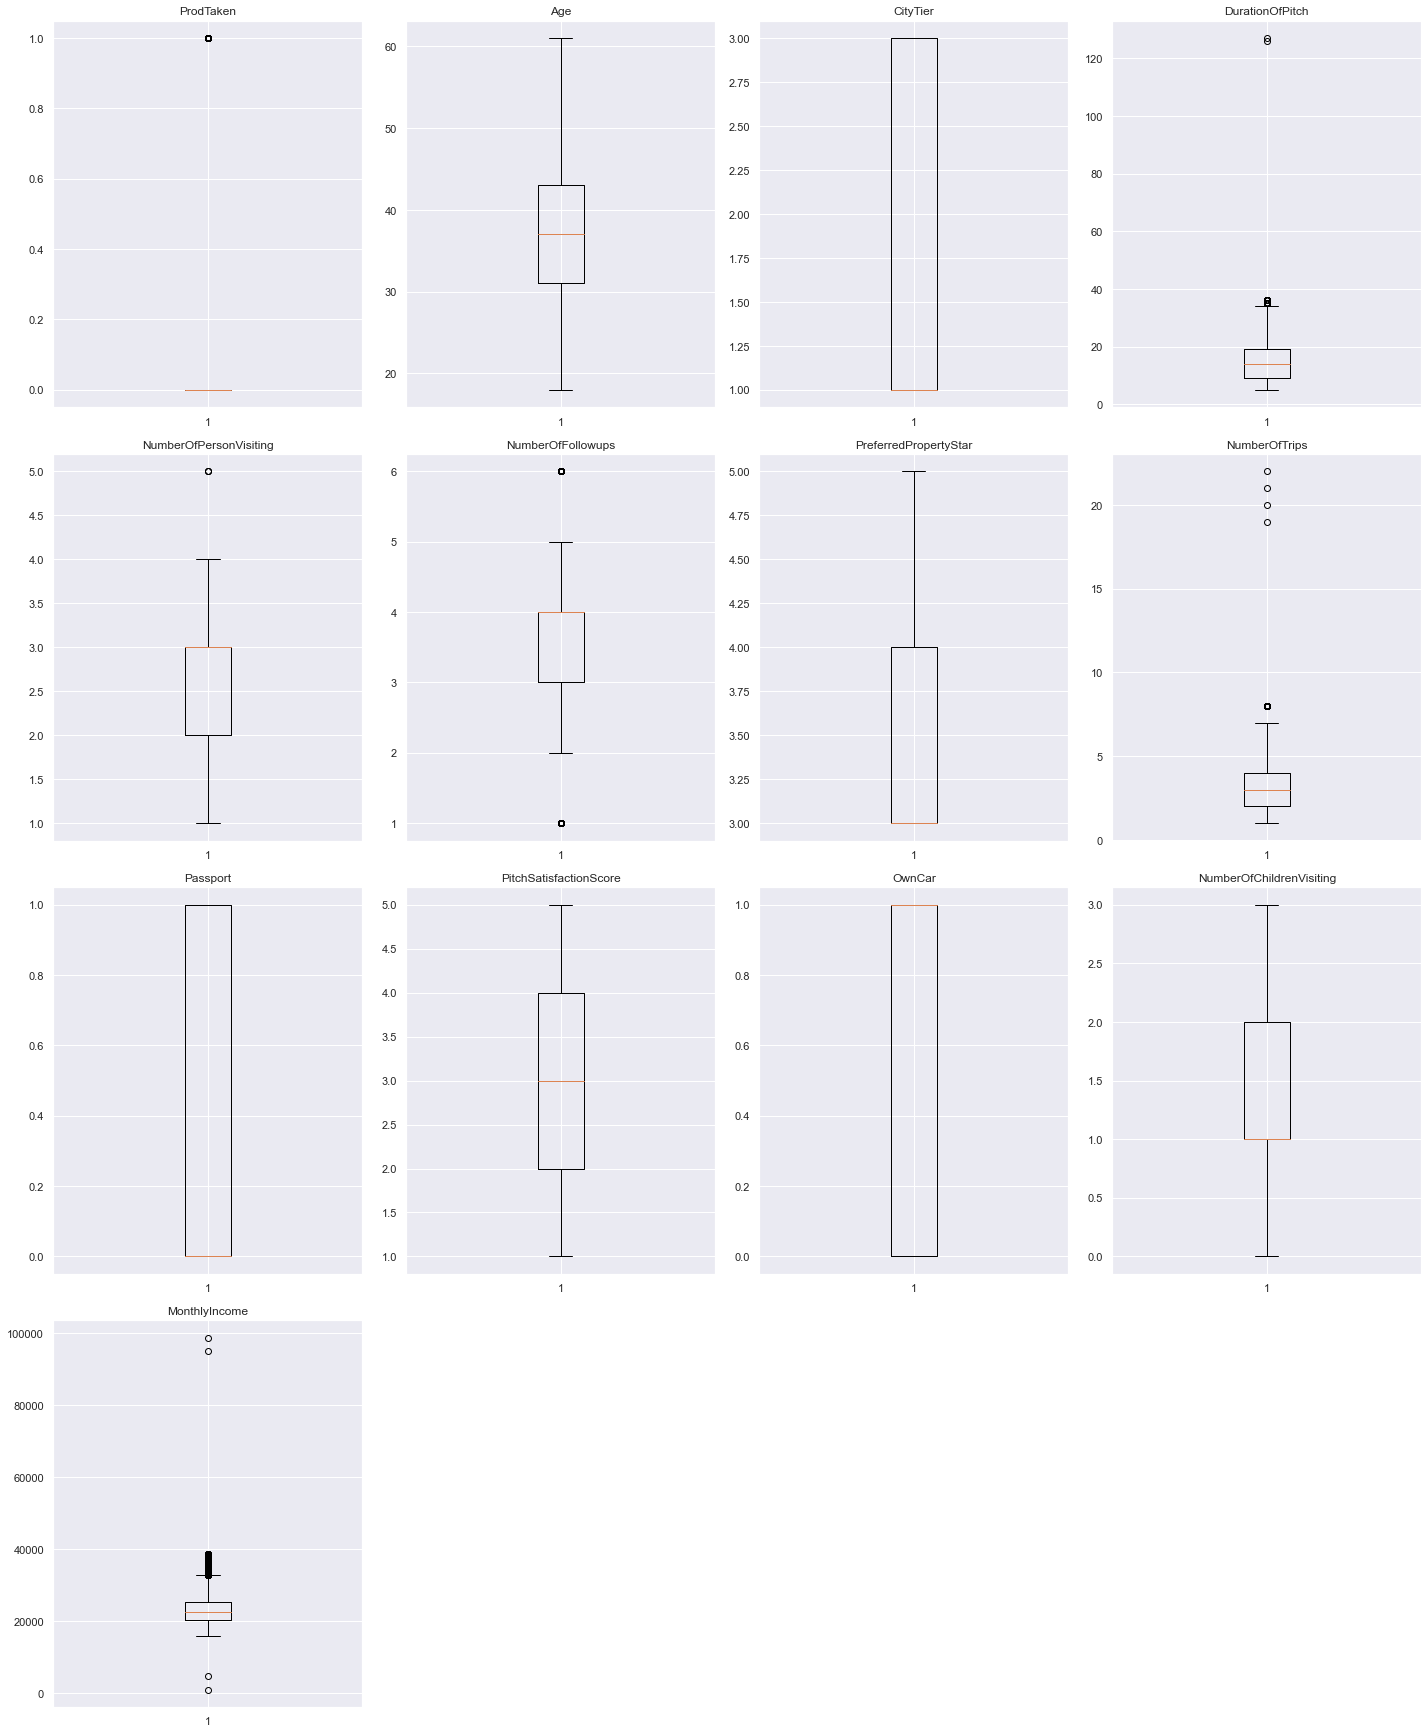

In [72]:
# outlier detection using boxplot
numerical_col = tourismdataDF.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(tourismdataDF[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Treating outliers as they have a potential to skew the models
* There are relatively few outliers in the data but still it will be good idea to treat them by updating the values smaller than lower whisker to the lower whisker value and updating the values greater than upper whisker to the upper whisker value 

In [73]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

In [74]:
numerical_col = tourismdataDF.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

  
# items to be removed 
treating= {'NumberOfFollowups', 'DurationOfPitch','MonthlyIncome'} # these column have very few non zero observation , doing outlier treatment would remove those observation so we are keeping it as it is
  
numerical_col = [ele for ele in numerical_col if ele  in treating] 
data = treat_outliers_all(tourismdataDF,numerical_col)

## One Hot encoding for categorical variables

In [75]:
# use pd.concat to join the new columns with your original dataframe
tourismdataDF = pd.concat([tourismdataDF,pd.get_dummies(tourismdataDF['TypeofContact'], prefix='TypeofContact')],axis=1)

# now drop the original 'Transmission' column 
tourismdataDF.drop(['TypeofContact'],axis=1, inplace=True)

In [76]:
tourismdataDF.sample(n=10) # 10 random rows

ProdTaken   Age  CityTier  DurationOfPitch      Occupation  Gender  \
2448          0  28.0         1         9.000000  Small Business    Male   
4233          0  33.0         3        15.000000  Large Business  Female   
2726          0  30.0         3         9.000000        Salaried    Male   
39            0  33.0         3         6.000000        Salaried  Female   
1347          0  37.0         2         8.000000        Salaried    Male   
1924          0  29.0         1        15.490835  Large Business    Male   
4701          0  56.0         1         9.000000        Salaried    Male   
2693          0  46.0         1        14.000000        Salaried    Male   
1211          0  37.0         3         6.000000  Small Business    Male   
1333          1  46.0         3        16.000000        Salaried  Female   

      NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
2448                       3                4.0          Basic   
4233                       4                5.0         Deluxe   
2726                       3                4.0         Deluxe   
39                         2                2.0         Deluxe   
1347                       3                4.0         Deluxe   
1924                       2                3.0         Deluxe   
4701                       4                4.0       Standard   
2693                       4                3.0         Deluxe   
1211                       2                5.0         Deluxe   
1333                       3                3.0       Standard   

      PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
2448                    4.0      Divorced            2.0         0   
4233                    4.0       Married            3.0         1   
2726                    3.0     Unmarried            3.0         0   
39                      5.0      Divorced            3.0         0   
1347                    3.0        Single            2.0         0   
1924                    3.0       Married            5.0         0   
4701                    4.0       Married            5.0         0   
2693                    3.0      Divorced            6.0         0   
1211                    3.0       Married            2.0         0   
1333                    4.0       Married            6.0         0   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
2448                       5       1                       1.0   
4233                       1       1                       3.0   
2726                       2       0                       1.0   
39                         3       1                       0.0   
1347                       3       1                       0.0   
1924                       5       1                       0.0   
4701                       1       0                       2.0   
2693                       2       0                       3.0   
1211                       1       0                       1.0   
1333                       1       0                       2.0   

         Designation  MonthlyIncome  TypeofContact_Company Invited  \
2448       Executive   22146.000000                              0   
4233         Manager   23906.000000                              0   
2726         Manager   23232.000000                              1   
39           Manager   20376.000000                              1   
1347         Manager   23619.853491                              1   
1924         Manager   23619.853491                              0   
4701  Senior Manager   29654.000000                              1   
2693         Manager   25112.000000                              1   
1211         Manager   24525.000000                              1   
1333  Senior Manager   22314.000000                              0   

      TypeofContact_Self Enquiry  
2448                           1  
4233                           1  
2726                           0  
39                             0 

In [77]:
# use pd.concat to join the new columns with your original dataframe
tourismdataDF = pd.concat([tourismdataDF,pd.get_dummies(tourismdataDF['Occupation'], prefix='Occupation')],axis=1)

# now drop the original 'Transmission' column 
tourismdataDF.drop(['Occupation'],axis=1, inplace=True)

In [78]:
# use pd.concat to join the new columns with your original dataframe
tourismdataDF = pd.concat([tourismdataDF,pd.get_dummies(tourismdataDF['Gender'], prefix='Gender')],axis=1)

# now drop the original 'Transmission' column 
tourismdataDF.drop(['Gender'],axis=1, inplace=True)

In [79]:
# use pd.concat to join the new columns with your original dataframe
tourismdataDF = pd.concat([tourismdataDF,pd.get_dummies(tourismdataDF['ProductPitched'], prefix='ProductPitched')],axis=1)

# now drop the original 'Transmission' column 
tourismdataDF.drop(['ProductPitched'],axis=1, inplace=True)

In [80]:
# use pd.concat to join the new columns with your original dataframe
tourismdataDF = pd.concat([tourismdataDF,pd.get_dummies(tourismdataDF['Designation'], prefix='Designation')],axis=1)

# now drop the original 'Transmission' column 
tourismdataDF.drop(['Designation'],axis=1, inplace=True)

In [81]:
tourismdataDF.sample(n=10) # 10 random rows

ProdTaken   Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
826           0  38.0         2         6.000000                       2   
4218          0  40.0         1         7.000000                       3   
3909          0  37.0         1        30.000000                       3   
839           0  42.0         3        10.000000                       2   
2082          0  28.0         3        15.490835                       2   
428           0  47.0         1         8.000000                       3   
4877          1  39.0         1        16.000000                       4   
984           0  28.0         3        15.490835                       2   
4787          0  37.0         1        13.000000                       3   
3092          0  38.0         3        28.000000                       3   

      NumberOfFollowups  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
826                 1.5                    3.0      Divorced            2.0   
4218                2.0                    3.0       Married            2.0   
3909                2.0                    3.0       Married            6.0   
839                 3.0                    5.0        Single            1.0   
2082                3.0                    4.0       Married            2.0   
428                 3.0                    3.0       Married            6.0   
4877                4.0                    5.0       Married            6.0   
984                 4.0                    5.0      Divorced            2.0   
4787                5.5                    3.0       Married            3.0   
3092                4.0                    3.0      Divorced            7.0   

      Passport  ...  ProductPitched_Basic  ProductPitched_Deluxe  \
826          0  ...                     1                      0   
4218         0  ...                     0                      0   
3909         0  ...                     0                      1   
839          0  ...                     0                      1   
2082         1  ...                     0                      1   
428          0  ...                     0                      1   
4877         0  ...                     0                      1   
984          0  ...                     0                      1   
4787         0  ...                     1                      0   
3092         0  ...                     1                      0   

      ProductPitched_King  ProductPitched_Standard  \
826                     0                        0   
4218                    0                        1   
3909                    0                        0   
839                     0                        0   
2082                    0                        0   
428                     0                        0   
4877                    0                        0   
984                     0                        0   
4787                    0                        0   
3092                    0                        0   

      ProductPitched_Super Deluxe  Designation_AVP  Designation_Executive  \
826                             0                0                      1   
4218                            0                0                      0   
3909                            0                0                      0   
839                             0                0                      0   
2082                            0                0                      0   
428                             0                0                      0   
4877                            0                0                      0   
984                             0                0                      0   
4787                            0                0                      1   
3092                            0                0                      1   

      Designation_Manager  Designation_Senior Manager  Designation_VP  
826                     0          

In [82]:
# use pd.concat to join the new columns with your original dataframe
tourismdataDF = pd.concat([tourismdataDF,pd.get_dummies(tourismdataDF['MaritalStatus'], prefix='MaritalStatus')],axis=1)

# now drop the original 'Transmission' column 
tourismdataDF.drop(['MaritalStatus'],axis=1, inplace=True)

In [83]:
tourismdataDF.sample(n=10) # 10 random rows

ProdTaken   Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
4137          0  39.0         3        10.000000                       4   
3400          0  57.0         2        15.000000                       3   
654           0  39.0         2         8.000000                       2   
1442          1  29.0         1        15.490835                       2   
1814          0  35.0         1        11.000000                       3   
3300          0  21.0         1        10.000000                       3   
2293          0  29.0         1        16.000000                       3   
4336          1  20.0         2         9.000000                       3   
4274          0  58.0         1         7.000000                       3   
3079          0  36.0         1        16.000000                       4   

      NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
4137                4.0                    3.0            2.0         0   
3400                4.0                    3.0            8.0         0   
654                 4.0                    3.0            1.0         0   
1442                3.0                    3.0            1.0         1   
1814                3.0                    4.0            1.0         0   
3300                5.0                    3.0            3.0         0   
2293                3.0                    4.0            1.0         0   
4336                5.0                    3.0            3.0         0   
4274                4.0                    3.0            4.0         0   
3079                5.0                    3.0            3.0         1   

      PitchSatisfactionScore  ...  ProductPitched_Super Deluxe  \
4137                       1  ...                            0   
3400                       4  ...                            0   
654                        3  ...                            0   
1442                       3  ...                            0   
1814                       3  ...                            0   
3300                       3  ...                            0   
2293                       5  ...                            0   
4336                       3  ...                            0   
4274                       3  ...                            0   
3079                       4  ...                            0   

      Designation_AVP  Designation_Executive  Designation_Manager  \
4137                0                      0                    0   
3400                0                      0                    0   
654                 0                      0                    1   
1442                0                      1                    0   
1814                0                      0                    0   
3300                0                      1                    0   
2293                0                      1                    0   
4336                0                      1                    0   
4274                0                      0                    1   
3079                0                      0                    0   

      Designation_Senior Manager  Designation_VP  MaritalStatus_Divorced  \
4137                           1               0                       0   
3400                           0               1                       0   
654                            0               0                       1   
1442                           0               0                       0   
1814                           1               0                       0   
3300                           0               0                       0   
2293                           0               0                       0   
4336                           0               0                       0   
4274                           0               0                       0   
3079                           1               0                       1   

      MaritalStatus

## Model Building

### Function to compute the Accuracy, Recall and Precision

In [84]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [85]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Split the data into train and test sets

In [86]:
X = tourismdataDF.drop("ProdTaken" , axis=1)
y = tourismdataDF.pop("ProdTaken")

- The data (classification) is exhibiting a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

**What does a travel company want?**
* Tourism company wants to put efforts behind customers who have higher chances to take the travel package  - it can face 2 types of nisleads here: 
   * Whenever company targets a customer to take the travel package and the customer does not take it.
   * Whenever company does not pursue a customer to take a package and the customer could have got it.

**Which scenario has a greater impact ?**
* Putting marketing resources behind customers having very less or no chance to take the package leads to waster of time, money and effort.

**Since we don't want tourism campaign to go behind customers having less chance of taking travel we should use Recall as a metric of model evaluation instead of accuracy.**

* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of dedicating efforts on customers who will not take the package

### Bagging Classifier

In [88]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [89]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9923998830751243
Accuracy on test set :  0.907293796864349
Recall on training set :  0.9611801242236024
Recall on test set :  0.605072463768116
Precision on training set :  0.9983870967741936
Precision on test set :  0.8608247422680413


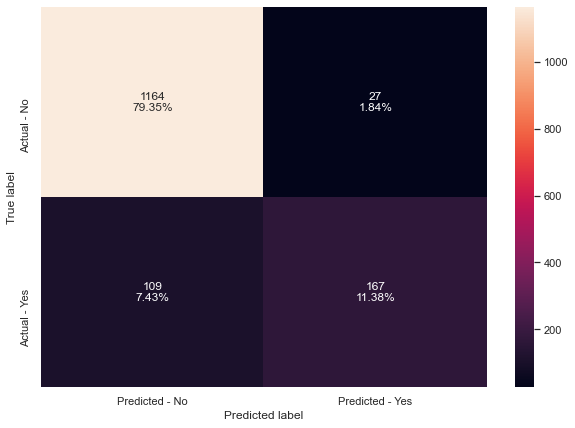

In [90]:
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [91]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [92]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9154737559645535
Recall on training set :  1.0
Recall on test set :  0.6014492753623188
Precision on training set :  1.0
Precision on test set :  0.9222222222222223


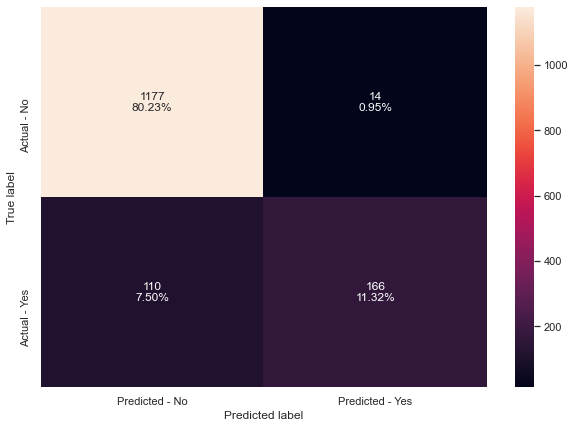

In [93]:
make_confusion_matrix(rf_estimator,y_test)

**Insights with default parameters:**

- Both models - Bagging classifiers as well as random forest classifier are overfitting the train data.Random forest is more overfitting
- Both models are giving close to performance in terms of accuracy but bagging classifier is giving better recall.

## Hyperparameter Tuning

### Bagging Classifier

* We will be tuning the following Hyper parameters

* n_estimators: The number of trees in the forest, default = 100.
* max_features: The number of features to consider when looking for the best split.
* max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.

In [94]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [95]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9216087252897068
Recall on training set :  0.9984472049689441
Recall on test set :  0.6304347826086957
Precision on training set :  1.0
Precision on test set :  0.93048128342246


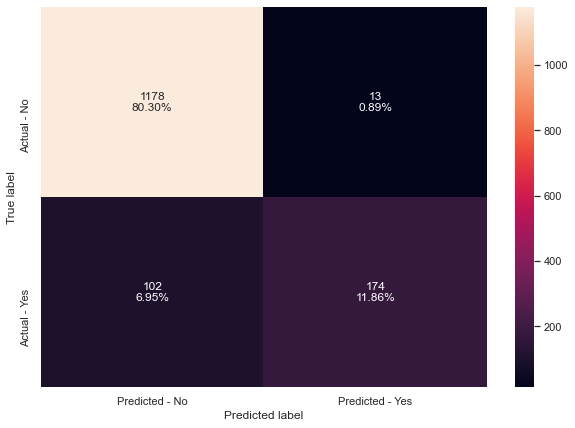

In [96]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

In [97]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

In [98]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8374744226834259
Accuracy on test set :  0.8336741649625086
Recall on training set :  0.20652173913043478
Recall on test set :  0.19202898550724637
Precision on training set :  0.7471910112359551
Precision on test set :  0.7162162162162162


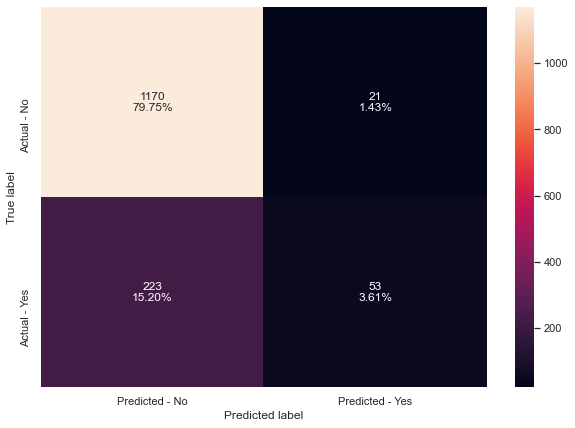

In [99]:
make_confusion_matrix(bagging_lr,y_test)


### Insights
- We can see that train accuracy and recall for the bagging classifier have increased slightly after hyperparameter tuning but the test recall has decreased.
- The model is overfitting the data, as train accuracy and recall are 1
- The confusion matrix shows that the model is better at identifying people not taking the package as compared to the one's taking the package

### Random Forest Classifier
**Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.


In [100]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=250, random_state=1)

In [101]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.907044723764981
Accuracy on test set :  0.8752556237218814
Recall on training set :  0.5341614906832298
Recall on test set :  0.40942028985507245
Precision on training set :  0.9502762430939227
Precision on test set :  0.849624060150376


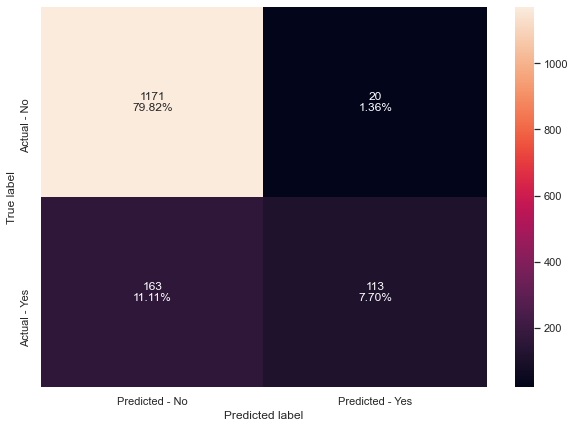

In [102]:
make_confusion_matrix(rf_estimator_tuned,y_test)

* Random Forest with hyper tuned parameters is giving not as good a recall than the previous one.

## Boosting

### AdaBoost Classifier

In [103]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [104]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8485822858813212
Accuracy on test set :  0.8507157464212679
Recall on training set :  0.32298136645962733
Recall on test set :  0.32971014492753625
Precision on training set :  0.7172413793103448
Precision on test set :  0.728


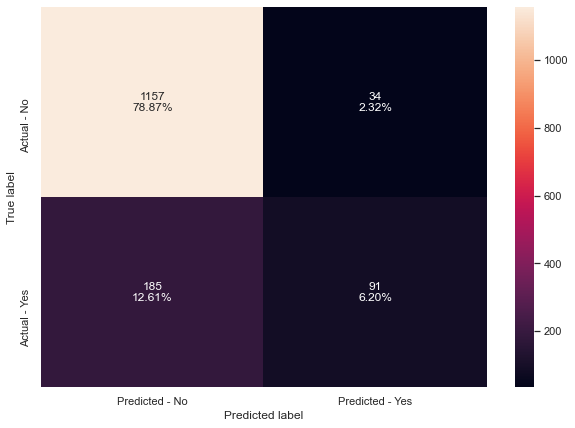

In [105]:
make_confusion_matrix(abc,y_test)

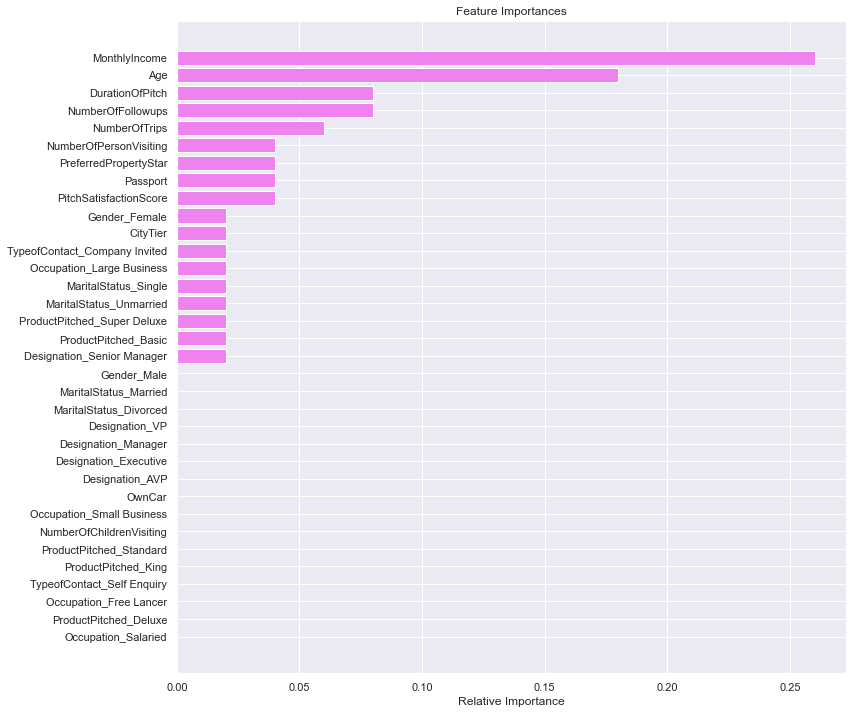

In [162]:
importances = abc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Insights
- Recall is low with AdaBoost classifier


### Gradient Boosting Classifier

In [106]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [107]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8880444314527915
Accuracy on test set :  0.8725289706884799
Recall on training set :  0.4658385093167702
Recall on test set :  0.42028985507246375
Precision on training set :  0.8849557522123894
Precision on test set :  0.8111888111888111


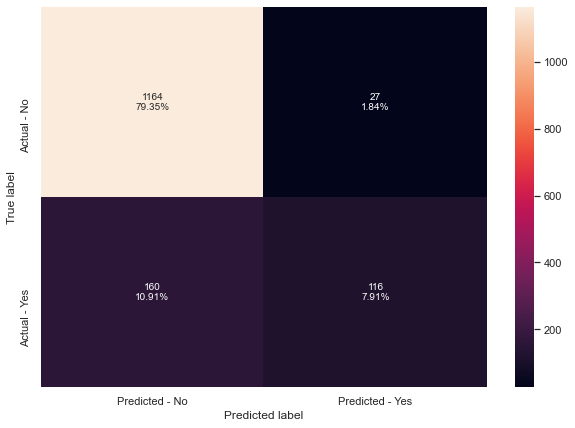

In [164]:
make_confusion_matrix(gbc,y_test)

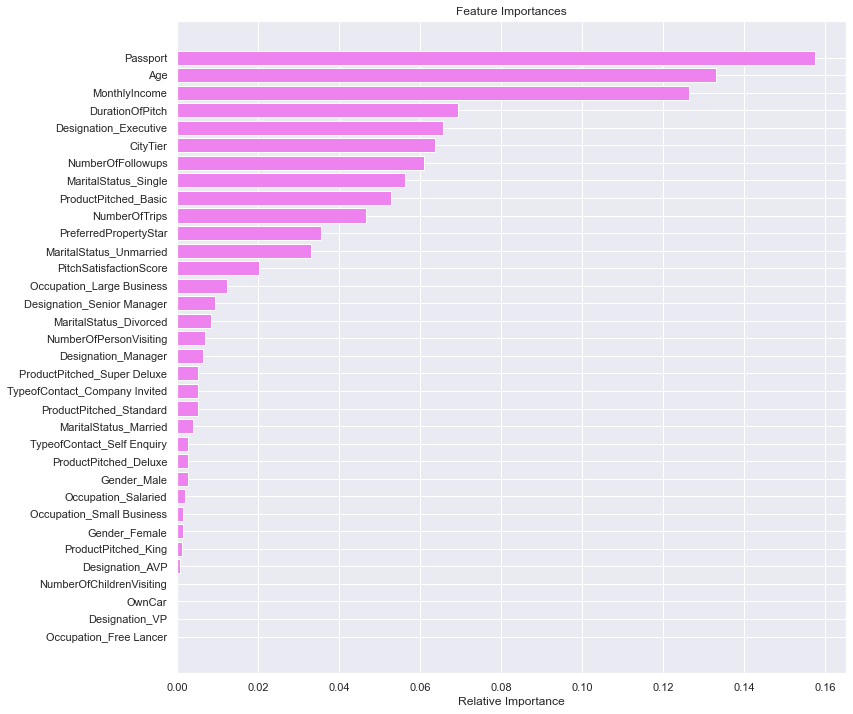

In [163]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Insights
- Recall is low with gradient boost classifier

### XGBoost Classifier

In [108]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[16:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9250170415814588
Recall on training set :  0.9984472049689441
Recall on test set :  0.6884057971014492
Precision on training set :  1.0
Precision on test set :  0.8878504672897196


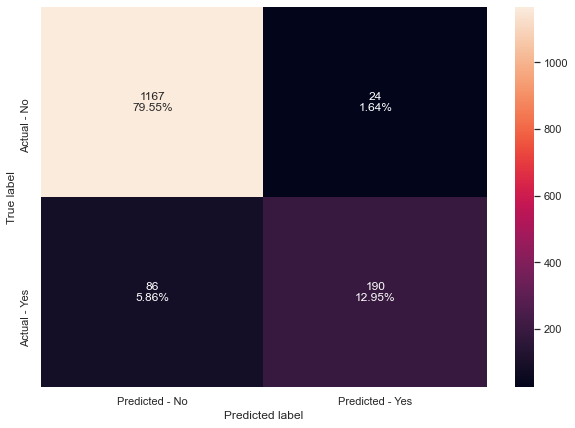

In [110]:
make_confusion_matrix(xgb,y_test)

**Insights with default parameters:**
- Accuracy and Recall for XGBoost classifier is better than the other two.
- AdaBoost classifier has least test accuracy and test recall.

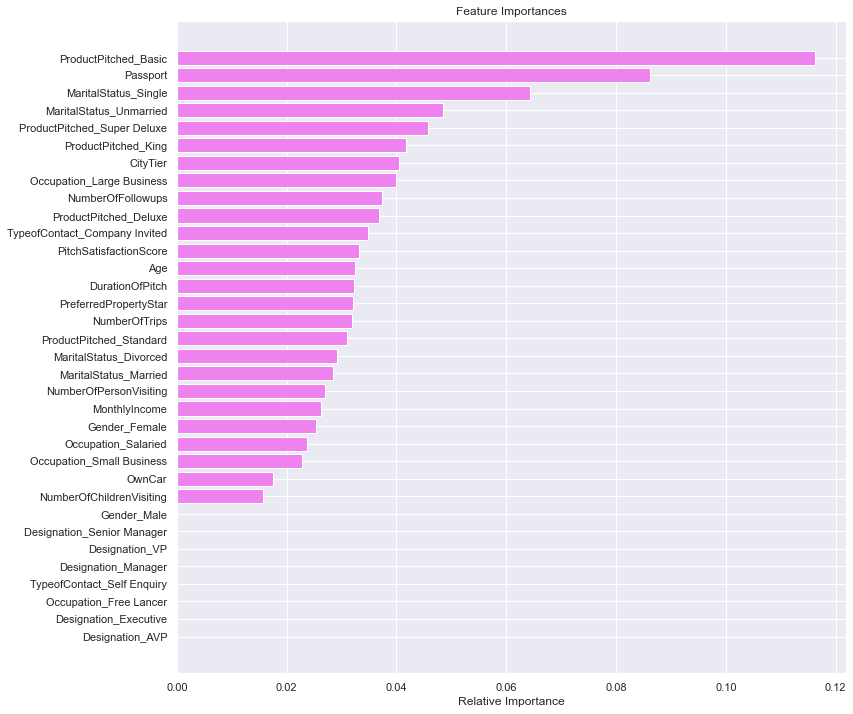

In [165]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Hyperparameter Tuning

### AdaBoost Classifier

In [111]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.7000000000000002, n_estimators=90,
                   random_state=1)

In [112]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9757380882782812
Accuracy on test set :  0.858214042263122
Recall on training set :  0.9145962732919255
Recall on test set :  0.5869565217391305
Precision on training set :  0.9546191247974068
Precision on test set :  0.6328125


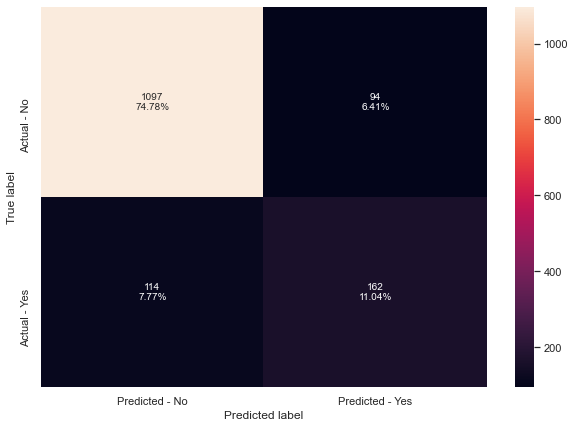

In [166]:
make_confusion_matrix(abc_tuned,y_test)

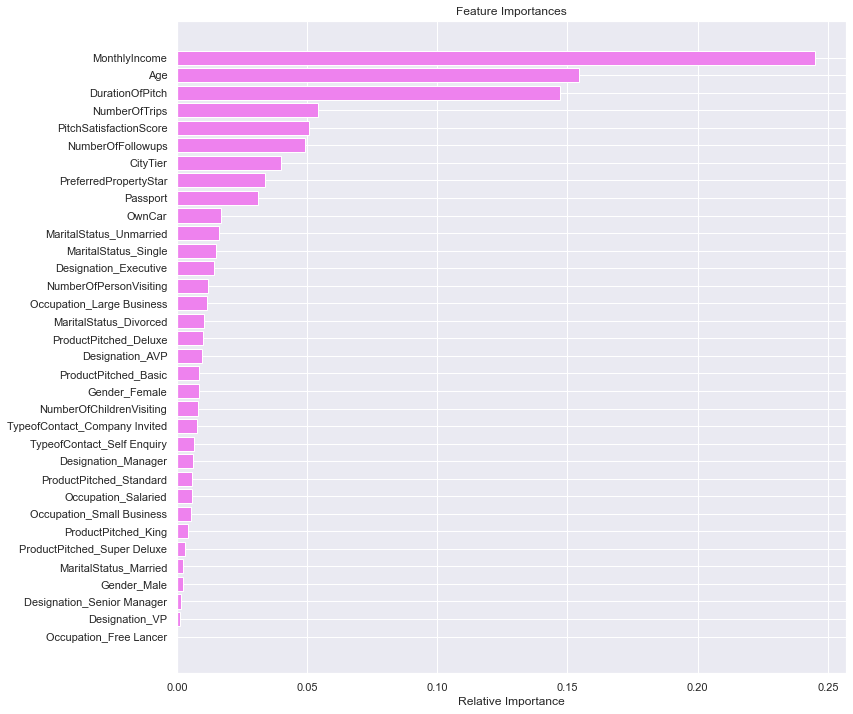

In [113]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Using Hyper tuned Adaboost classifier the recall is better than without the hypertuning
* Monthly Income is the most important attribute followed by Age and Duration of pitch

### Gradient Boosting Classifier

In [114]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [115]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8877521192633733
Accuracy on test set :  0.869120654396728
Recall on training set :  0.4658385093167702
Recall on test set :  0.40217391304347827
Precision on training set :  0.8823529411764706
Precision on test set :  0.8043478260869565


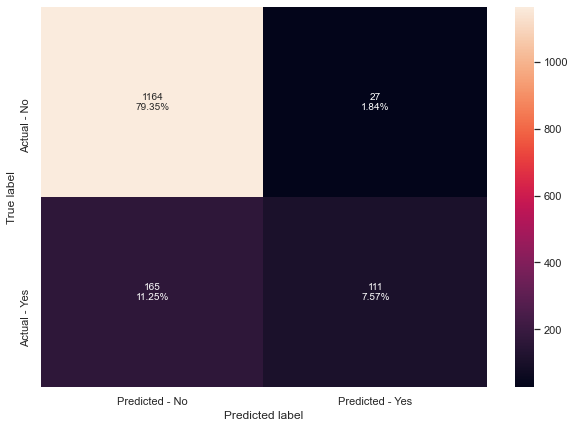

In [168]:
make_confusion_matrix(gbc_init,y_test)

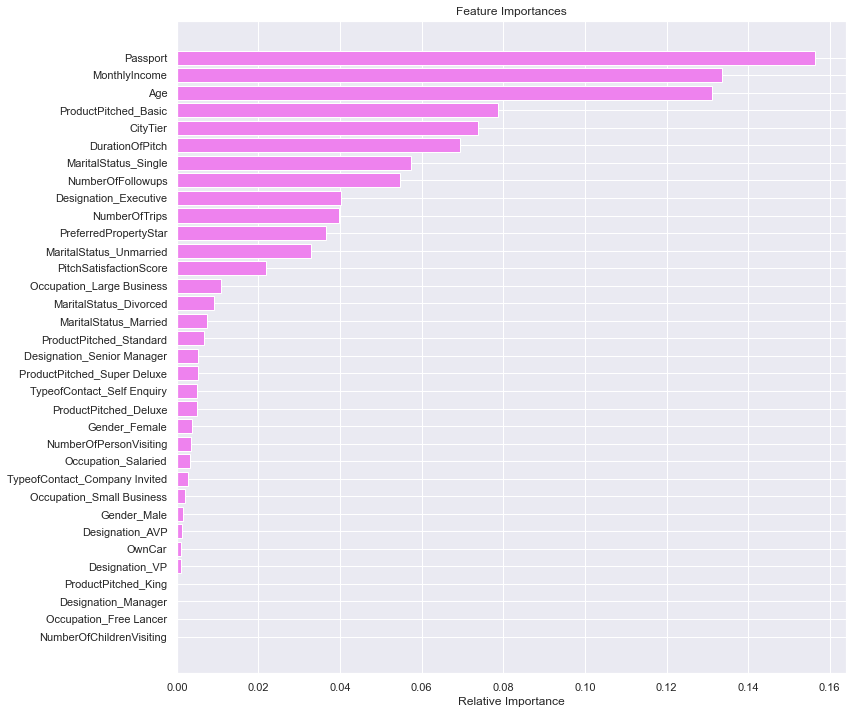

In [167]:
importances = gbc_init.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights with default parameters:**
- Recall is low with gradient Boost with Adaboost classifier init.

In [116]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

In [117]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9234142063724057
Accuracy on test set :  0.885480572597137
Recall on training set :  0.6257763975155279
Recall on test set :  0.5072463768115942
Precision on training set :  0.9504716981132075
Precision on test set :  0.813953488372093


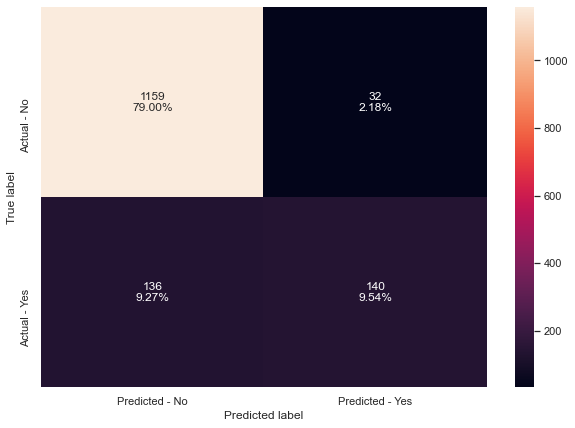

In [118]:
make_confusion_matrix(gbc_tuned,y_test)

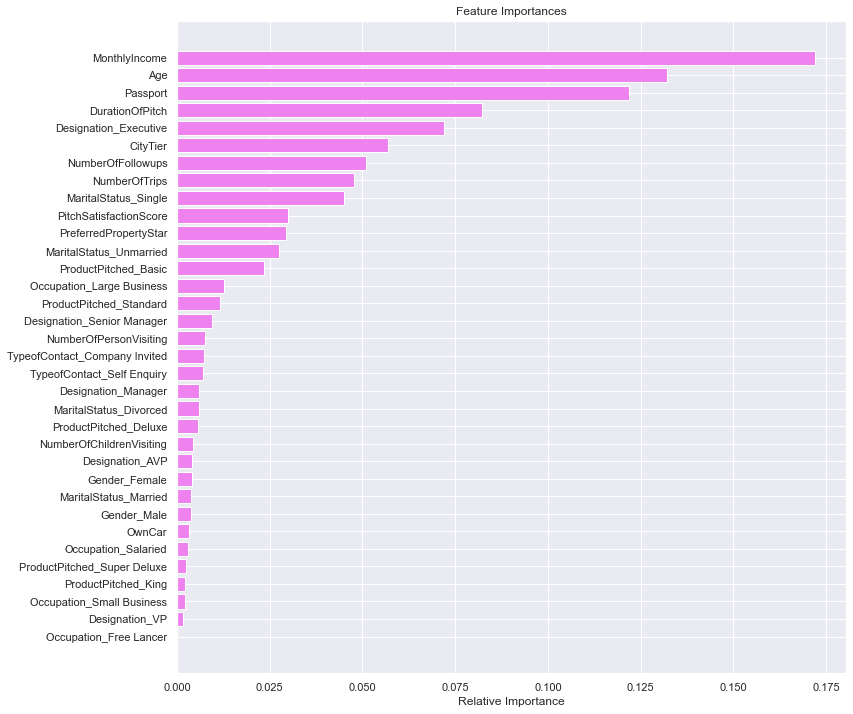

In [119]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Tuned gradient Boosting model has a better recall than untuned one.

### XGBoost Classifier Hyperparameters tuning

In [178]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,30,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [180]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.8640748319204911
Accuracy on test set :  0.825494205862304
Recall on training set :  0.906832298136646
Recall on test set :  0.8333333333333334
Precision on training set :  0.5904954499494439
Precision on test set :  0.5227272727272727


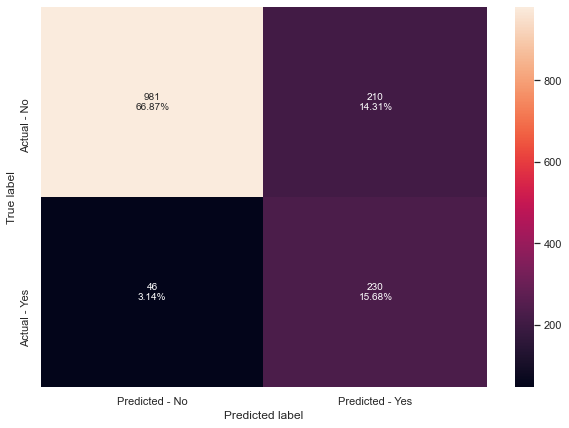

In [158]:
make_confusion_matrix(xgb_tuned,y_test)

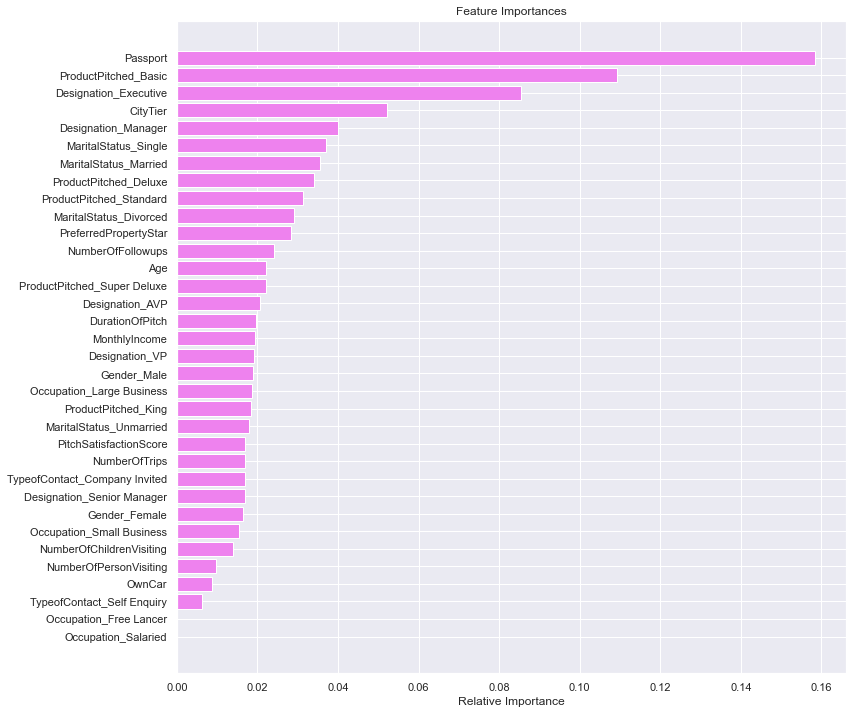

In [169]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights :**
- Recall is by far the best on testing data.
- Accuracy is fair on both training and testing data.
- Precision is a bit low on training and testing data.

## Decision Tree Model

In [126]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [127]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [129]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [153]:
# Recall on train and test
dTree_score=get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8936605316973415
Recall on training set :  1.0
Recall on test set :  0.6739130434782609
Precision on training set :  1.0
Precision on test set :  0.7380952380952381


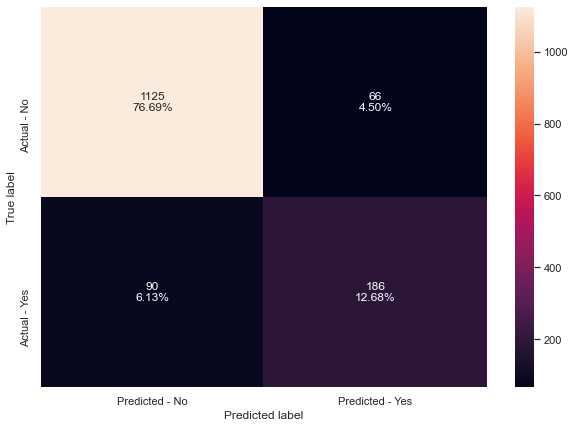

In [131]:
make_confusion_matrix(dTree,y_test)

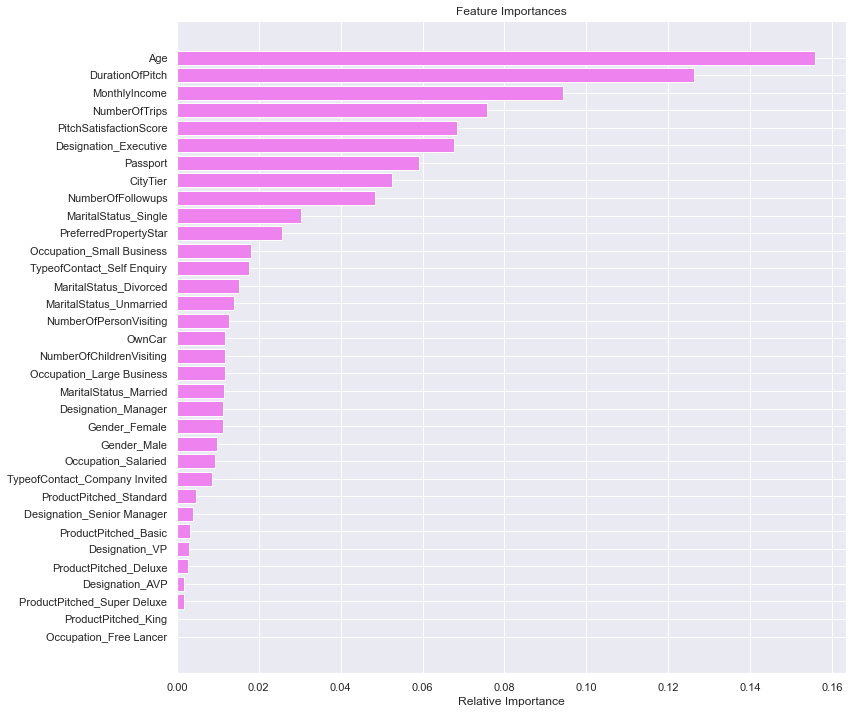

In [132]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights :**
* The accuracy, recall and precision on training set is 1 which clearly shows overfitting.

## Hyperparameter tuning of Decision Tree

In [141]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

In [142]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.8213972522654195
Accuracy on test set :  0.8411724608043627
Recall on training set :  0.3416149068322981
Recall on test set :  0.3695652173913043


* Recall on training and testing set is way poorer with Hyper tuning

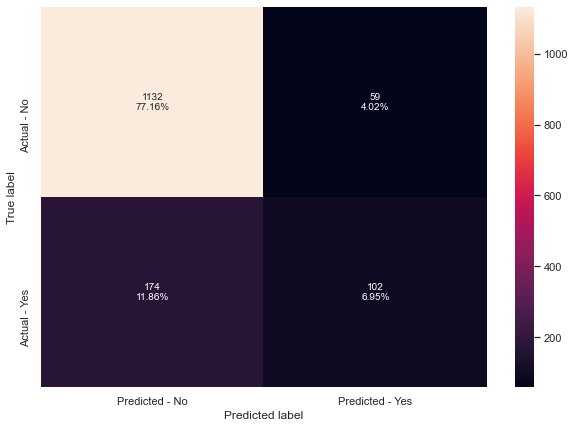

In [170]:
make_confusion_matrix(estimator,y_test)

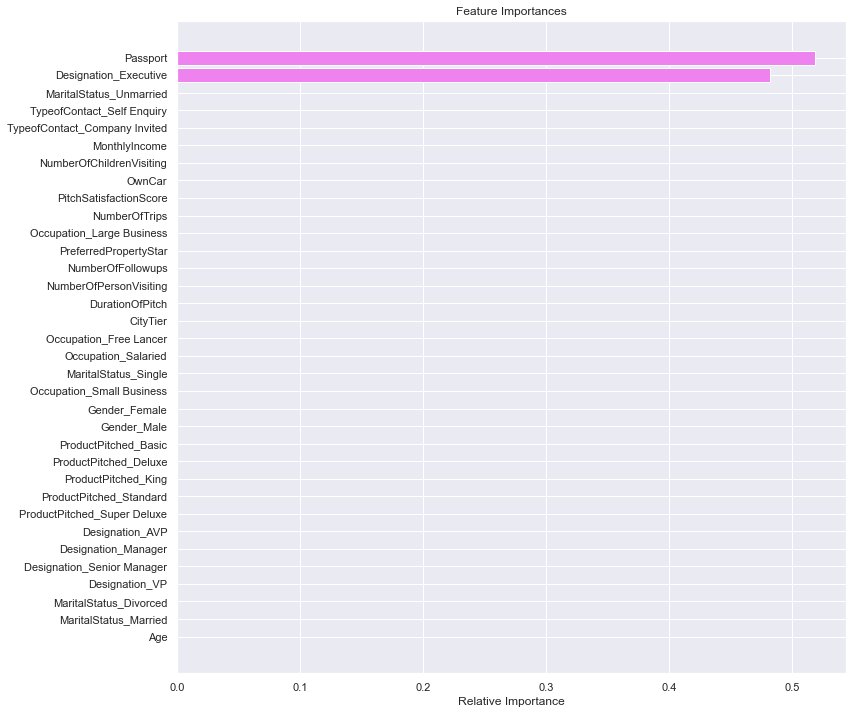

In [171]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights :**
* The recall is too low on the training and testing data.

## Stacking Model

**Stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [147]:
estimators=[('Decision Tree', estimator),('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [150]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

[18:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=2,
                                                       max_leaf_nodes=3,
                                                       min_impurity_decrease=0.001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=250,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier...
                                                 importance_type='ga

In [151]:
stacking_estimator_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9219526454253142
Accuracy on test set :  0.8759372869802318
Recall on training set :  0.6894409937888198
Recall on test set :  0.5398550724637681
Precision on training set :  0.8688845401174168
Precision on test set :  0.7303921568627451


**Insights :**
* The recall is fair even though the accuracy is good.
* Precision is also good.

## Comparing all models

In [159]:
# defining list of models
models = [bagging_estimator,rf_estimator,bagging_estimator_tuned,rf_estimator_tuned,abc,gbc,xgb,abc_tuned,gbc_init,gbc_tuned,xgb_tuned,dTree,estimator,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [160]:
comparison_frame = pd.DataFrame({'Model':['Bagging Classifier','Random Forest Classifier','Bagging Classifier Tuned','Random Forest Classifier Tuned','AdaBoost with default parameters','Gradient Boost Classifier  default parameters','XGBoost Classifier default params','AdaBoost Tuned', 
                                          'Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost Tuned','Descision Tree','Decision Tree Tuned','Stacking'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

Model  Train_Accuracy  \
0                              Bagging Classifier            0.99   
1                        Random Forest Classifier            1.00   
2                        Bagging Classifier Tuned            1.00   
3                  Random Forest Classifier Tuned            0.91   
4                AdaBoost with default parameters            0.85   
5   Gradient Boost Classifier  default parameters            0.89   
6               XGBoost Classifier default params            1.00   
7                                  AdaBoost Tuned            0.98   
8            Gradient Boosting with init=AdaBoost            0.89   
9                         Gradient Boosting Tuned            0.92   
10                                  XGBoost Tuned            0.86   
11                                 Descision Tree            1.00   
12                            Decision Tree Tuned            0.82   
13                                       Stacking            0.92   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0            0.91          0.96         0.61             1.00            0.86  
1            0.92          1.00         0.60             1.00            0.92  
2            0.92          1.00         0.63             1.00            0.93  
3            0.88          0.53         0.41             0.95            0.85  
4            0.85          0.32         0.33             0.72            0.73  
5            0.87          0.47         0.42             0.88            0.81  
6            0.93          1.00         0.69             1.00            0.89  
7            0.86          0.91         0.59             0.95            0.63  
8            0.87          0.47         0.40             0.88            0.80  
9            0.89          0.63         0.51             0.95            0.81  
10           0.83          0.91         0.83             0.59            0.52  
11           0.89          1.00         0.67             1.00            0.74  
12           0.84          0.34         0.37             0.54            0.63  
13           0.88          0.69         0.54             0.87            0.73

- Tuned XGBoost model is the best model here in terms of recall. It has highest recall on the test data and recall on the training data is also not too much overfitting. Accuracy is also fair. Precision is a bit low. 
- XGBoost tuned, XGBoost classifier with default params, Bagging Classifier, Adaboost tuned are the top 4 models. Apart from XGBoost tuned the rest of the three models are close in terms of recall.
- XG Boost classifier with default parameters is overfitting on training data.

##  Business Recommendations

* As seen from most of the models the most important things for customers taking the product are the one's who have the passport.The company should try to focus more on people having passports as they do not have any restrictions to travel internationally also.
* The second important thing is monthly income. Income have a postive correlation with decision to take the product. The company must focus on selling Basic product to customers in the lowest income range customers. They should focus on customers with slightly higher income range to take deluxe product.Basically customers with monthly income range till 25000 should be focused for basic and Deluxe. They should focus on the highest income range individuals for King product , income range > 35000 followed by Super deluxe and standard product for income ranges between 25000- 35000
* Age has a negative corrrelation with the package been sold, so the focus should be more on younger people.
* The class of customers taking the product most is Executive class followed by managers/senior managers and large businesses  The focus should be on these classes.
* The package is been sold a bit more in males as compared to females.
* The marketing should focus on customers from tier2 and tier3 cities more than tier1 city customers.
* In general they should try to sell Basic and Standard more based on previous experience.
* They should focus on single people more than married or divorced people.
* They should focus more on higher sales pitch satisfaction score.
* They should focus more on the customers who had 2-3 people visiting.
* For Basic, Deluxe and King they should have followups between 3-5 atleast whereas for super deluxe  3 followups should be ok.
